<div style="color:white;display:fill;border-radius:8px;
            background-color:#a7d5ed;font-size:170%;
            font-family:Nexa;letter-spacing:4.5px;">    
    <h1 style="padding:15px;color:black;text-align: center"> Feature Engineering </h1> 
</div>

![](img/header.png)

<div style="color:white;border-radius:8px;background-color:#a7d5ed">    
    <h1 style="padding:12px;color:black;"> OBJETIVO </h1>    
</div>

O objetivo neste notebook é criação novas variáveis (features) que possam ajudar na identificação de novos padrões, com a finalidade de bater a baseline estabelecida no [notebook anterior](https://github.com/rogeriodelfim/Competicoes/blob/main/Flai/10/02%20-%20Features%20Engineering.ipynb) com XGBoost na competição. 



<div style="color:white;border-radius:8px;background-color:#a7d5ed">    
    <h1 style="padding:12px;color:black;"> 1. IMPORTAÇÕES </h1>    
</div>

## 1.1. Instalações

In [1]:
COLAB = 'google.colab' in str(get_ipython()) 

if COLAB:        
    !pip install --q scikit-plot
    !pip install --q category_encoders
    !pip install --q shap
    !pip install --q inflection    
    !pip install --q catboost
    !pip install --q colorama
    !pip install --q tensorflow
    !pip install --q wandb
    !pip install --q eli5
    #!pip install --q optbinning
    #!pip install --q catboost
    #!pip install --q pandas-profiling
    #!pip install --q pycaret
        
    from google.colab import drive
    drive.mount('/content/drive')

## 1.2. Bibliotecas 

In [2]:
import warnings
import random
import os
import gc
import torch
import sklearn.exceptions
import shap
import multiprocessing
import glob
import scipy.optimize 
import scipy.special

In [3]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt 
import seaborn           as sns
import joblib            as jb
import scipy.stats       as stats
import statsmodels.api   as sm
import xgboost           as xgb
import scikitplot        as skplt
import category_encoders as ce

In [4]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing   import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.preprocessing   import MaxAbsScaler, QuantileTransformer 
from sklearn.preprocessing   import PowerTransformer, Normalizer
from sklearn.preprocessing   import LabelBinarizer, OneHotEncoder, OrdinalEncoder
from sklearn                 import metrics
from sklearn.metrics         import ConfusionMatrixDisplay, confusion_matrix
from datetime                import datetime

In [5]:
from sklearn.cluster         import KMeans
from sklearn.decomposition   import PCA

In [6]:
from scipy.stats             import skew, norm
from scipy.stats             import norm

In [7]:
from yellowbrick.cluster        import KElbowVisualizer, SilhouetteVisualizer
from sklearn.utils.class_weight import compute_sample_weight
from scipy                      import stats
from math                       import factorial
from scipy.stats                import mode
from collections                import Counter
from sklearn.neighbors          import KNeighborsClassifier

In [8]:
from scipy.stats                import skew, norm
from sklearn.model_selection    import RandomizedSearchCV, GridSearchCV
from sklearn.calibration        import CalibrationDisplay
from colorama                   import Fore, Back, Style

In [9]:
from sklearn.compose            import ColumnTransformer, make_column_transformer
from sklearn.feature_selection  import VarianceThreshold
from sklearn.impute             import SimpleImputer
from scipy.stats                import chi2_contingency
from plotly.subplots            import make_subplots
from sklearn.base               import BaseEstimator, RegressorMixin, TransformerMixin, clone
from sklearn.feature_selection  import SelectPercentile, VarianceThreshold, SelectKBest, f_classif

In [10]:
from sklearn.metrics            import precision_score, roc_auc_score
from sklearn.metrics            import accuracy_score
from sklearn.metrics            import recall_score
from sklearn.metrics            import fbeta_score
from sklearn.metrics            import f1_score
from sklearn.metrics            import log_loss
from sklearn.impute             import SimpleImputer
from sklearn.metrics            import make_scorer
from sklearn.metrics            import classification_report, confusion_matrix
from sklearn.mixture            import GaussianMixture, BayesianGaussianMixture
from sklearn                    import metrics

In [11]:
from imblearn.over_sampling     import SMOTE
from imblearn.under_sampling    import RandomUnderSampler
from sklearn.pipeline           import Pipeline, make_pipeline, FeatureUnion

In [12]:
from matplotlib.axes._axes     import _log as matplotlib_axes_logger
from sklearn.model_selection   import train_test_split, KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing     import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer 

## 1.3. Funções

Abaixo foi criado uma classe com diversas funções, que será utilizada nos processos e modelagem.

In [13]:
class Utility():
        
    def __init__(self):
        self.name_ =''
       
    def jupyter_setting():
    
        %matplotlib inline

        #os.environ["WANDB_SILENT"] = "true" 
        #plt.style.use('bmh') 
        #plt.rcParams['figure.figsize'] = [20,15]
        #plt.rcParams['font.size']      = 13

        matplotlib_axes_logger.setLevel('ERROR')

        pd.options.display.max_columns = None
        #pd.set_option('display.expand_frame_repr', False)

        warnings.filterwarnings(action='ignore')
        warnings.simplefilter('ignore')
        warnings.filterwarnings('ignore')
        warnings.filterwarnings('ignore', category=DeprecationWarning)
        warnings.filterwarnings('ignore', category=FutureWarning)
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        warnings.filterwarnings('ignore', category=UserWarning)
        warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
        warnings.filterwarnings("ignore", category= sklearn.exceptions.UndefinedMetricWarning)
        warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

        pd.options.mode.chained_assignment = None 
        pd.set_option('display.max_rows', 200)
        pd.set_option('display.max_columns', 500)
        pd.set_option('display.max_colwidth', 200)

        icecream = ["#00008b", "#960018","#008b00", "#00468b", "#8b4500", "#582c00"]
        #sns.palplot(sns.color_palette(icecream))

        colors = ["lightcoral", "sandybrown", "darkorange", "mediumseagreen",
              "lightseagreen", "cornflowerblue", "mediumpurple", "palevioletred",
              "lightskyblue", "sandybrown", "yellowgreen", "indianred",
              "lightsteelblue", "mediumorchid", "deepskyblue"]

        # Colors
        dark_red   = "#b20710"
        black      = "#221f1f"
        green      = "#009473"
        myred      = '#CD5C5C'
        myblue     = '#6495ED'
        mygreen    = '#90EE90'    
        color_cols = [myred, myblue,mygreen]

        return icecream, colors, color_cols

    def missing_zero_values_table(self, df):
        
        mis_val         = df.isnull().sum()
        mis_val_percent = round(df.isnull().mean().mul(100), 2)
        mz_table        = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table        = mz_table.rename(columns = {df.index.name:'col_name', 
                                                     0 : 'Valores ausentes', 
                                                     1 : '% de valores totais'})
        
        mz_table['Tipo de dados'] = df.dtypes
        mz_table                  = mz_table[mz_table.iloc[:,1] != 0 ]. \
                                     sort_values('% de valores totais', ascending=False)
        
        msg = "Seu dataframe selecionado tem {} colunas e {} " + \
              "linhas. \nExistem {} colunas com valores ausentes."
            
        print (msg.format(df.shape[1], df.shape[0], mz_table.shape[0]))
        
        return mz_table.reset_index()
    
    def reduce_memory_usage(self, df, verbose=True):
    
        numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
        start_mem = df.memory_usage().sum() / 1024 ** 2

        for col in df.columns:

            col_type = df[col].dtypes

            if col_type in numerics:
                c_min = df[col].min()
                c_max = df[col].max()

                if str(col_type)[:3] == "int":
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                else:
                    if (
                        c_min > np.finfo(np.float16).min
                        and c_max < np.finfo(np.float16).max
                    ):
                        df[col] = df[col].astype(np.float16)
                    elif (
                        c_min > np.finfo(np.float32).min
                        and c_max < np.finfo(np.float32).max
                    ):
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)
        end_mem = df.memory_usage().sum() / 1024 ** 2
        if verbose:
            print(
                "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                    end_mem, 100 * (start_mem - end_mem) / start_mem
                )
            )

        return df
    
    def graf_label(self, ax, total):

         for i in ax.patches:
            # get_width pulls left or right; get_y pushes up or down
            width, height = i.get_width() -.2 , i.get_height()

            x, y  = i.get_xy()  
            color = 'white'
            alt   = .5
            soma  = 0 

            if height < 70:
                color = 'black'
                alt   = 1
                soma  = 10

            ax.annotate(str(round((i.get_height() * 100.0 / total), 1) )+'%', 
                        (i.get_x()+.55*width, 
                         i.get_y()+soma + alt*height),
                         color   = color,
                         weight = 'bold',
                         size   = 14)
            
    def graf_bar(self, df, col, title, xlabel, ylabel, tol = 0):
    
        #ax    = df.groupby(['churn_cat'])['churn_cat'].count()
        ax     = df    
        colors = col

        if tol == 0: 
            total  = sum(ax)
            ax = (ax).plot(kind    ='bar',
                           stacked = True,
                           width   = .5,
                           rot     = 0,
                           color   = colors, 
                           grid    = False)
        else:
            total  = tol     
            ax = (ax).plot(kind    ='bar',
                           stacked = True,
                           width   = .5,
                           rot     = 0,
                           figsize = (10,6),
                           color   = colors,
                           grid    = False)

        title   = title #+ ' \n'
        xlabel  = '\n ' + xlabel 
        ylabel  = ylabel + ' \n'

        ax.set_title(title  , fontsize=22)
        ax.set_xlabel(xlabel, fontsize=12)
        ax.set_ylabel(ylabel, fontsize=12)    

        min = [0,23000000]
        #ax.set_ylim(min)
        self.graf_label(ax, total)

    def correlation(self, df_, threshold_):
        col_corr    = set()  
        corr_matrix = df_.corr()
        
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > threshold_: 
                    colname = corr_matrix.columns[i]  
                    col_corr.add(colname)
                    
        return col_corr

    def __graf_fature_corr(df_, annot_=False, threshold_=.8, print_var_=False, 
                         print_graf_=True, mask_=True, title_='', method_='pearson'):
        
        msg_title = '\n Correlação das variável {} -{} \n'.format(title_, 'method_')
        
        df = df_.copy().corr(method =method_).round(5)
        
        if print_graf_: 
            # Máscara para ocultar a parte superior direita do gráfico, pois é uma duplicata
            mask = np.zeros_like(df)
            mask[np.triu_indices_from(mask)] = mask_
            
            # Making a plot
            ax = sns.heatmap(df, annot=annot_, 
                             mask=mask, 
                             cmap="RdBu", 
                             annot_kws={"weight": "bold", "fontsize":13}                              
                            )

            ax.set_title(msg_title, fontsize=17)
            
            plt.setp(ax.get_xticklabels(), 
                     rotation      = 90, 
                     ha            = "right",
                     rotation_mode = "anchor", 
                     weight        = "normal", style = 'whitegrid', palette= 'pastel')

            plt.setp(ax.get_yticklabels(), 
                     weight        = "normal",
                     rotation_mode = "anchor", 
                     rotation      = 0, 
                     ha            = "right", style = 'whitegrid', palette= 'pastel')
            
            
            
            plt.show();
            
            
            
        if print_var_:         
            df_corr = df[abs(df)>threshold_][df!=1.0].unstack().dropna().reset_index()
            if len(df_corr)>0:            
                print('Variáveis autocorrelacionadas threshold={:2.2f}'.format(threshold_))
                df_corr.columns =  ['var_1', 'var_2', 'corr']
                display(df_corr)
            else: 
                print('Não tem variáveis autocorrelacionadas threshold={:2.2f}'.format(threshold_))
        
        #sns.set(style="darkgrid")
        plt.show();
                        
    def describe(self, df):
        var = df.columns

        # Medidas de tendência central, média e mediana 
        ct1 = pd.DataFrame(df[var].apply(np.mean)).T
        ct2 = pd.DataFrame(df[var].apply(np.median)).T

        # Dispensão - str, min , max range skew, kurtosis
        d1 = pd.DataFrame(df[var].apply(np.std)).T
        d2 = pd.DataFrame(df[var].apply(min)).T
        d3 = pd.DataFrame(df[var].apply(max)).T
        d4 = pd.DataFrame(df[var].apply(lambda x: x.max() - x.min())).T
        d5 = pd.DataFrame(df[var].apply(lambda x: x.skew())).T
        d6 = pd.DataFrame(df[var].apply(lambda x: x.kurtosis())).T
        d7 = pd.DataFrame(df[var].apply(lambda x: (3 *( np.mean(x) - np.median(x)) / np.std(x) ))).T

        # concatenete 
        m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6, d7]).T.reset_index()
        m.columns = ['attrobutes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis','coef_as']

        return m

    def graf_outlier(self, df, feature):
        col = [(0,4), (5,9)]

        df_plot = ((df[feature] - df[feature].min())/
                   (df[feature].max() - df[feature].min()))

        fig, ax = plt.subplots(len(col), 1, figsize=(15,7))

        for i, (x) in enumerate(col): 
            sns.boxplot(data = df_plot.iloc[:, x[0]:x[1] ], ax = ax[i]); 

    def diff(self, t_a, t_b):
        from dateutil.relativedelta import relativedelta
        t_diff = relativedelta(t_b, t_a)  # later/end time comes first!
        return '{h}h {m}m {s}s'.format(h=t_diff.hours, m=t_diff.minutes, s=t_diff.seconds)
    
    def free_gpu_cache(self):

        # https://www.kaggle.com/getting-started/140636
        #print("Initial GPU Usage")
        #gpu_usage()                             

        #cuda.select_device(0)
        #cuda.close()
        #cuda.select_device(0)   

        gc.collect()
        torch.cuda.empty_cache()

    def graf_eval(self):

        results     = model.evals_result()
        ntree_limit = model.best_ntree_limit

        plt.figure(figsize=(20,7))

        for i, error in  enumerate(['mlogloss', 'merror']):#

            plt.subplot(1,2,i+1)
            plt.plot(results["validation_0"][error], label="Treinamento")
            plt.plot(results["validation_1"][error], label="Validação")

            plt.axvline(ntree_limit, 
                        color="gray", 
                        label="N. de árvore ideal {}".format(ntree_limit))


            title_name ='\n' + error.upper() + ' PLOT \n'
            plt.title(title_name)
            plt.xlabel("Número de árvores")
            plt.ylabel(error)
            plt.legend();

    def linear_fit_slope(self, y):
        """Return the slope of a linear fit to a series."""
        y_pure = y.dropna()
        length = len(y_pure)
        x = np.arange(0, length)
        slope, intercept = np.polyfit(x, y_pure.values, deg=1)
        return slope

    def linear_fit_intercept(self, y):
        """Return the intercept of a linear fit to a series."""
        y_pure = y.dropna()
        length = len(y_pure)
        x = np.arange(0, length)
        slope, intercept = np.polyfit(x, y_pure.values, deg=1)
        return intercept

    def cromer_v(self, x, y):
        cm       = pd.crosstab(x, y).to_numpy()        
        n        = cm.sum()
        r, k     = cm.shape
        chi2     = stats.chi2_contingency(cm)[0]
        chi2corr = max(0, chi2 - (k-1) * (r-1) /(n-1))
        kcorr    = k - (k-1) **2/(n-1)
        rcorr    = r - (r-1) **2/(n-1)    
        v        = np.sqrt((chi2corr/n) / (min(kcorr-1, rcorr-1)))        
        return v  

    def generate_category_table(self, data):

        cols    = data.select_dtypes(include='object').columns
        dataset = pd.DataFrame()

        for i in cols:
            corr = []
            for x in cols: 
                corr.append(self.cromer_v(data[i],data[x]))

            aux     = pd.DataFrame({i:corr})
            dataset = pd.concat([dataset, aux], axis=1) 

        return dataset.set_index(dataset.columns)
            
    def graf_feature_corr(self, df_, annot_=False, threshold_=.8, print_var_=False, 
                          print_graf_=True, mask_=True, title_='', method_='pearson'):

        df = df_.corr(method=method_).round(5)

        if print_graf_: 
            # Máscara para ocultar a parte superior direita do gráfico, pois é uma duplicata
            mask = np.zeros_like(df)
            mask[np.triu_indices_from(mask)] = mask_

            sns.set(style="whitegrid", palette="pastel") 
            
            # Making a plot
            ax = sns.heatmap(df, annot = annot_, 
                             mask      = mask, 
                             cmap      = "RdBu", 
                             fmt       = ".2f",
                             annot_kws = {"weight": "bold", "fontsize":10}
                            )
            
            ax.set_title("\n Correlação das variável {} - {} \n".format(title_, method_.upper()), fontsize=17)

            plt.setp(ax.get_xticklabels(), 
                     rotation      = 90, 
                     ha            = "right",
                     rotation_mode = "anchor", 
                     weight        = "normal")

            plt.setp(ax.get_yticklabels(), 
                     weight        = "normal",
                     rotation_mode = "anchor", 
                     rotation      = 0, 
                     ha            = "right")
            
            sns.set(style="darkgrid")

            plt.show();

        if print_var_:         
            df_corr = df[abs(df)>threshold_][df!=1.0].unstack().dropna().reset_index()
            if len(df_corr)>0:            
                print('Variáveis autocorrelacionadas threshold={:2.2f}'.format(threshold_))
                df_corr.columns =  ['var_1', 'var_2', 'corr']
                display(df_corr)
            else: 
                print('Não tem variáveis autocorrelacionadas threshold={:2.2f}'.format(threshold_))
                
        return self.correlation(df_, threshold_)

    def plot_roc_curve(self, fpr, tpr, label=None):
        fig, ax = plt.subplots()
        ax.plot(fpr, tpr, "r-", label=label)
        ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for FLAI 08')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.grid(True)

    def feature_engineering(self, df_):

        var_f27 = ''
        for col in df_['f_27']: 
            var_f27 +=col

        var_f27 = list(set(var_f27))
        var_f27.sort()

        df_["fe_f_27_unique"] = df_["f_27"].apply(lambda x: len(set(x)))

        for letra in var_f27:             
            df_['fe_' + letra.lower() + '_count'] = df2_train["f_27"].str.count(letra)

        return df_ 

    def identifies_outliers(self, df):

        cols_num = df.select_dtypes(np.number).columns

        for col in cols_num: 
            if col != 'unnamed':            
                Q1  = df[col].quantile(0.25)
                Q3  = df[col].quantile(0.75)
                IQR = Q3-Q1
                lowqe_bound=Q1 - 1.5 * IQR
                upper_bound=Q3 + 1.5 * IQR

                df['outliers_'+ col] = 0
                df['outliers_'+ col][(df[col]<=lowqe_bound)|(df[col]>=upper_bound)] = 1    

                df[col] = np.where(df[col] > df[col].quantile(0.95),
                                                df[col].median(),
                                                df[col])

    def evaluation(self, y_, predictions_, smape_base_=100):
        from sklearn import metrics
        mae   = metrics.mean_absolute_error(y_, predictions_)
        mse   = metrics.mean_squared_error(y_, predictions_)
        rmse  = metrics.mean_squared_error(y_, predictions_, squared=False) 
        mape  = metrics.mean_absolute_percentage_error(y_, predictions_)
        smape = self.smape(y_, predictions_)
        r2    = metrics.r2_score(y_, predictions_)    
        return rmse, mae, mse, mape, r2, smape
    
    def feature_statistic(self, df, feature_float, feature_cat=None):
        df['fe_mean']        = df[feature_float].mean(axis=1)   
        df['fe_std']         = df[feature_float].std(axis=1)   
        df['fe_median']      = df[feature_float].median(axis=1)   
        df['fe_var']         = df[feature_float].var(axis=1) 
        df['fe_min']         = df[feature_float].min(axis=1)   
        df['fe_max']         = df[feature_float].max(axis=1)   
        df['fe_skew']        = df[feature_float].skew(axis=1)   
        df['fe_quantile_25'] = df[feature_float].quantile(q=.25, axis=1)
        df['fe_quantile_50'] = df[feature_float].quantile(q=.5, axis=1)
        df['fe_quantile_75'] = df[feature_float].quantile(q=.75, axis=1)
        
        if feature_cat is not None:
            df['fe_dammy_count'] = df[feature_cat].sum(axis=1)   
        
        return df
    
    def gridSearchCV(self, model_, params_, X_train_, y_train_):
        """
        @param    model: sklearn estimator
        @param    params (dict): Dictionary of possible parameters

        @return   cv_results (DataFrame)
        """
        model_cv = GridSearchCV(model_, param_grid=params_, scoring='roc_auc', cv=5)
        model_cv.fit(X_train_, y_train_)
        cv_results = pd.DataFrame(model_cv.cv_results_)[['params', 'mean_test_score']]

        return cv_results
    
    def evaluate(self, model,X_train_, y_train_, X_test_, plotROC=False):

        model.fit(X_train_, y_train_)
        probs = model.predict_proba(X_train_)
        preds = probs[:,1]
        fpr, tpr, threshold = roc_curve(y_train_, preds)
        roc_auc = auc(fpr, tpr)
        print(f'AUC: {roc_auc:.4f}')

        rocDf = pd.DataFrame({'fpr': fpr, 'tpr':tpr, 'threshold':threshold})
        rocDf['tpr - fpr'] = rocDf.tpr - rocDf.fpr
        optimalThreshold = rocDf.threshold[rocDf['tpr - fpr'].idxmax()]

        y_pred = np.where(preds >= optimalThreshold, 1, 0)

        # Plot ROC AUC
        if plotROC:
            plt.title('Receiver Operating Characteristic')
            plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
            plt.legend(loc = 'lower right')
            plt.plot([0, 1], [0, 1],'r--')
            plt.xlim([0, 1])
            plt.ylim([0, 1])
            plt.ylabel('True Positive Rate')
            plt.xlabel('False Positive Rate')
            plt.show()    

    def iqr_outliers(self, df,ft):

        q1  = df[ft].quantile(0.25)
        q3  = df[ft].quantile(0.75)
        iqr = q3-q1
        c   = 0 

        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr

        for i in range(len(df[ft])):
            if df[ft][i] > Upper_tail or df[ft][i] < Lower_tail:
                c+=1
        return c
    
    def outlier_create_feature_check(self, df_tr_, df_ts_, cols_=[], qt_inferior_=.25, qt_superior_=.75, 
                                     flg_ts_=True, input_limete_=False, verbose_=True):
    
        col_oltlier         = 'fe_outlier'
        df_tr_[col_oltlier] = 0 
        df_ts_[col_oltlier] = 0 

        for c in cols_:

            percentil25 = df_tr_[c].quantile(qt_inferior_)
            percentil75 = df_tr_[c].quantile(qt_superior_)

            iqr= percentil75 - percentil25 

            limite_inferior = percentil25 - 1.5 * iqr
            limite_superior = percentil75 + 1.5 * iqr

            df_tr_[col_oltlier][df_tr_[c]>limite_superior] = 1
            df_tr_[col_oltlier][df_tr_[c]<limite_inferior] = 1

            if input_limete_:
                df_tr_[c][df_tr_[c]>limite_superior] = limite_superior
                df_tr_[c][df_tr_[c]<limite_inferior] = limite_inferior

            if flg_ts_:
                df_ts_[col_oltlier][df_ts_[c]>limite_superior] = 1
                df_ts_[col_oltlier][df_ts_[c]<limite_inferior] = 1
                
                if input_limete_:
                    df_ts_[c][df_ts_[c]>limite_superior] = limite_superior
                    df_ts_[c][df_ts_[c]<limite_inferior] = limite_inferior

            if verbose_:
                print('Com a variável {}'.format(c))
                print(df_tr_[col_oltlier].value_counts())
                print()

        return df_tr_, df_ts_
        
    def calibrated_classifier_graf_model(self, mdl_list_, X_, y_, seed_=12359, figsize_=(10, 10), verbose_=False): 

        fig = plt.figure(1, figsize=figsize_)
        ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
        
        if verbose_: ax2 = plt.subplot2grid((3, 1), (2, 0))

        ax1.plot([0, 1], [0, 1], "k:", label="Perfeitamente calibrado")

        for name, mdl1 in mdl_list_:  
            model_pipeline  = Pipeline(steps=[
                ('preprocessor', preprocessor_1),
                #('sampler_over', over), 
                #('sampler_under', under),    
                ('variancethreshold', VarianceThreshold(threshold=0.1)),    
                ('selectpercentile', SelectPercentile(f_classif, percentile=90)), 
                ('model', mdl1)
                ])

            X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.5, random_state=seed_)

            model_calibrated = CalibratedClassifierCV(model_pipeline, method='isotonic', cv=2) 
            # method='isotonic' sigmoid

            model_calibrated.fit(X_train, y_train)

            if hasattr(model_calibrated, "predict_proba"):
                prob_pos = model_calibrated.predict_proba(X_val)[:, 1]
            else:  
                prob_pos = model_calibrated.decision_function(X_val)
                prob_pos = (prob_pos-prob_pos.min()) / (prob_pos.max()-prob_pos.min())

            score = brier_score_loss(y_val, prob_pos, pos_label=y_val.max())

            frac_of_pos, mean_pred_value = calibration_curve(y_val, prob_pos, n_bins=15, normalize=True)      

            ax1.plot(mean_pred_value, frac_of_pos, "s-", label="%s (%1.3f)" % (name, score))

            ax1.set_ylabel('Fração de positivos')
            ax1.set_ylim([-0.05, 1.05])
            ax1.legend(loc='upper left' )
            ax1.set_title('\nGráficos de calibração (curva de confiabilidade)\n', fontsize=18)

            if verbose_: 
                ax2.hist(prob_pos, range=(0, 1), bins=100, label=name, histtype="step", lw=2)    
                ax2.set_xlabel('Valor médio previsto')
                ax2.set_ylabel('Quantidade')
                ax2.legend(loc="upper left", ncol=1)

                plt.tight_layout()

                msg = 'AUC: {:2.5f} - F1: {:2.5f} - Perda: {:2.3f} -> {}'
                auc = roc_auc_score(y_val, prob_pos)
                f1  = f1_score(y_val, (prob_pos>.5).astype(int))
                print(msg.format(auc,f1, score, name))

        plt.show()

    def describe(df):
        var = df.columns

        # Medidas de tendência central, média e mediana 
        ct1 = pd.DataFrame(df[var].apply(np.mean)).T
        ct2 = pd.DataFrame(df[var].apply(np.median)).T

        # Dispensão - str, min , max range skew, kurtosis
        d1 = pd.DataFrame(df[var].apply(np.std)).T
        d2 = pd.DataFrame(df[var].apply(min)).T
        d3 = pd.DataFrame(df[var].apply(max)).T
        d4 = pd.DataFrame(df[var].apply(lambda x: x.max() - x.min())).T
        d5 = pd.DataFrame(df[var].apply(lambda x: x.skew())).T
        d6 = pd.DataFrame(df[var].apply(lambda x: x.kurtosis())).T
        d7 = pd.DataFrame(df[var].apply(lambda x: (3 *( np.mean(x) - np.median(x)) / np.std(x) ))).T

        # concatenete 
        m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6, d7]).T.reset_index()
        m.columns = ['attrobutes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis','coef_as']
        
        return m
        
    def smape(self, a, f):
        return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

    def smape_(self, y_true, y_pred, base_=100.):
        denominator          = (np.abs(y_true)+np.abs(y_pred))/base_
        diff                 = np.abs(y_true-y_pred)/denominator
        diff[denominator==0] = 0.0
        return np.nanmean(diff)
    
    def smape_loss(y_true, y_pred):
        """SMAPE Loss"""
        return np.abs(y_true - y_pred) / (y_true + np.abs(y_pred)) * 200
    
    def calc_erro(y, y_pred, outros=True, ruturn_score=False):
        erro   = smape(y, y_pred)    
        
        
        if outros:        
            rmse = metrics.mean_squared_error(y, y_pred, squared=False)
            mape = metrics.mean_absolute_percentage_error(y, y_pred)
            mae  = metrics.mean_absolute_error(y, y_pred)
            
            print('RMSE : {:2.5f}'.format(rmse))
            print('MAE  : {:2.5f}'.format(mae))
            print('MAPE : {:2.5f}'.format(mape))
            
            
        if ruturn_score: 
            return erro
        else: 
            print('SMAPE: {:2.5f}'.format(erro))
            
    def graf_outlier(df, feature):
        col = [(0,4), (5,9)]

        df_plot = ((df[feature] - df[feature].min())/
                (df[feature].max() - df[feature].min()))

        fig, ax = plt.subplots(len(col), 1, figsize=(15,7))

        for i, (x) in enumerate(col): 
            sns.boxplot(data = df_plot.iloc[:, x[0]:x[1] ], ax = ax[i]); 
                    
    def graf_eval():

        results     = model.evals_result()
        ntree_limit = model.best_ntree_limit

        plt.figure(figsize=(20,7))

        for i, error in  enumerate(['mlogloss', 'merror']):#
            
            plt.subplot(1,2,i+1)
            plt.plot(results["validation_0"][error], label="Treinamento")
            plt.plot(results["validation_1"][error], label="Validação")

            plt.axvline(ntree_limit, 
                        color="gray", 
                        label="N. de árvore ideal {}".format(ntree_limit))
                        
            
            title_name ='\n' + error.upper() + ' PLOT \n'
            plt.title(title_name)
            plt.xlabel("Número de árvores")
            plt.ylabel(error)
            plt.legend();
        
    def linear_fit_slope(y):
        """Return the slope of a linear fit to a series."""
        y_pure = y.dropna()
        length = len(y_pure)
        x = np.arange(0, length)
        slope, intercept = np.polyfit(x, y_pure.values, deg=1)
        return slope
        
    def linear_fit_intercept(y):
        """Return the intercept of a linear fit to a series."""
        y_pure = y.dropna()
        length = len(y_pure)
        x = np.arange(0, length)
        slope, intercept = np.polyfit(x, y_pure.values, deg=1)
        return intercept
    
    def create_fold(self, path_): 

        paths = ['img', 'Data', 'Data/pkl', 'Data/submission', 'Data/tunning', 
                 'model', 'model/preds', 'model/optuna','model/preds/test', 'Data/shap',
                 'model/preds/test/n1', 'model/preds/test/n2', 'model/preds/test/n3', 
                 'model/preds/train', 'model/preds/train/n1', 'model/preds/train/n2', 
                 'model/preds/train/n3', 'model/preds/param', 'model/mdl', 'model/preds/folds' ]

        for p in paths:
            try:
                os.mkdir(path_+p)       
            except:
                #print('Erro ao criar pasta: {} '.format(path+p))
                pass 
        
utility = Utility()

In [14]:
icecream, colors, color_cols = Utility.jupyter_setting()
n_threads = multiprocessing.cpu_count()

In [15]:
def delete_files(namefile):

        path = ['model/train', 'model/test', 'model/valid', 'model/params', 'model/score',
                'model/test_f', 'model/cv_model', 'model/preds', 'model/optuna', 
                'model/preds/train', 'model/preds/test', 'model/preds/test/n1', 
                'model/preds/test/n2', 'model/preds/test/n3', 'model/preds/train/n1', 
                'model/preds/train/n2', 'model/preds/train/n3','model/preds/param', 
                'Data/submission/tunning', 'Data/submission', 'model/mdl'
                
               ]

        for path_ in path:
            for raiz, diretorios, arquivos in os.walk(path_):
                for arquivo in arquivos:
                    if arquivo.startswith(namefile):                    
                        os.remove(os.path.join(raiz, arquivo))

In [16]:
def save_data_model(model_, model_name_, path_, y_pred_train_prob_, y_pred_test_prob_, y_pred_test_submission_, 
                    score_, seed_, level_='1', target_='target', cutoff_value_=.6, gera_submission_=True):    
    
    level = 'n' + level_ + '/'

    if score_>cutoff_value_:    
        
        path_name_param = path_ + 'model/preds/param/' + model_name_.format(score_, seed_) + '.pkl.z'
        path_name_train = path_ + 'model/preds/train/' + level + model_name_.format(score_, seed_)  + '.pkl.z'
        path_name_test  = path_ + 'model/preds/test/'  + level + model_name_.format(score_, seed_)  + '.pkl.z'   
        path_name_model = path_ + 'model/mdl/'         + model_name_.format(score_, seed_)  + '.pkl.z'   
        
        delete_files(model_name_)
        
        jb.dump(y_pred_train_prob_, path_name_train)
        jb.dump(y_pred_test_prob_, path_name_test)
        jb.dump(model_, path_name_model)
                
        if gera_submission_:
            df_submission[target_] = y_pred_test_submission_
            df_submission.to_csv(path_ + 'Data/submission/' + model_name_+ '.csv', index=False)

In [17]:
def plot_metric(result):
    plt.figure(figsize=(16, 4))
    
    for i, metric in enumerate(['logloss']):
        plt.subplot(1, 2, i+1)
        train_metric = result['train'][metric]
        plt.plot(train_metric, label=f'train {metric}')
        eval_metric = result['valid'][metric]
        plt.plot(eval_metric, label=f'valid {metric}')
        plt.grid()
        plt.legend()
        plt.xlabel('rounds')
        plt.ylabel(f'{metric}')
    plt.show()

In [18]:
def model_cv_fit(models_, X_, y_, X_test_, path_, target_, seed_=12359, print_report_=False,
                 n_splits_=5, print_hist_=False, create_sub_=False, save_ensamble_=True,
                 model_feature_=None):
    
    X_ = X_.copy() 
    X_test_ = X_test_.copy()
    
    cols         = []
    cols_score   = []
    mdl_list_fit = []
    tag          = 90
    oof_train    = np.zeros((len(X_), len(models_)))
    score_mdl    = np.zeros(len(models_),)
    oof_test     = np.zeros((len(X_test_), len(models_)))
    kf           = StratifiedKFold(shuffle=True, n_splits=n_splits_, random_state=seed_)
    
    for i, m in enumerate(models_):
        
        time_start       = datetime.now()
        model            = m[1]
        type_model       = m[2]
        name_sub         = m[3]
        n_estimators     = m[5]
        score_list       = []
        score_list_f1    = []
        score_list_f1_tr = []
        y_ts_pred        = 0 
        
        delete_files(name_sub)
        
        print()
        print('=> {}'.format(m[0]))
        print('='*tag)

        for fold, (idx_tr, idx_va) in enumerate(kf.split(X_, y_)):
            
            time_fold_start = datetime.now()
            X_ts            = X_test_.copy()
            
            X_tr = X_.iloc[idx_tr]
            X_va = X_.iloc[idx_va]
            y_tr = y_.iloc[idx_tr]
            y_va = y_.iloc[idx_va]
            
            if model_feature_ is not None:
                X_tr_ = X_tr.copy()
                X_va_ = X_va.copy()
                X_ts_ = X_ts.copy()
                if model_feature_[1] is not None:
                    X_tr_ = model_feature_[1].fit_transform(X_tr, y_tr)
                    X_va_ = model_feature_[1].transform(X_va)
                    X_ts_ = model_feature_[1].transform(X_ts)
                    
                model_feature_[0].fit(X_tr_, y_tr)
                
                X_tr['fe_model'] = model_feature_[0].predict_proba(X_tr_)[:,1]
                X_va['fe_model'] = model_feature_[0].predict_proba(X_va_)[:,1]
                X_ts['fe_model'] = model_feature_[0].predict_proba(X_ts_)[:,1]
            
            if type_model==1:
                model.fit(X_tr, y_tr)

            if type_model==2:
                pp_processor = m[4]
                X_tr = pp_processor.fit_transform(X_tr, y_tr)
                X_va = pp_processor.transform(X_va)
                X_ts = pp_processor.transform(X_ts)
                
                model.fit(X_tr, y_tr,
                          model__eval_set=[(X_va, y_va)],
                          #model__eval_metric ='binary_logloss',
                          #model__callbacks=[early_stopping_rounds=100]
                          model__early_stopping_rounds=50,
                          model__verbose              = False)
            
            if type_model==3:
                model.fit(X_tr, y_tr,
                          eval_set              = [(X_tr, y_tr), (X_va, y_va)],
                          early_stopping_rounds = int(n_estimators*.3),
                          verbose               = False)
                                
            if type_model==4:
                pp_processor = m[4]
                X_tr = pp_processor.fit_transform(X_tr, y_tr)
                X_va = pp_processor.transform(X_va)
                X_ts = pp_processor.transform(X_test_.copy())
                model.fit(X_tr, y_tr,
                          eval_set              = [(X_tr, y_tr), (X_va, y_va)],
                          early_stopping_rounds = int(n_estimators*.3),
                          verbose               = False)
            
            y_va_pred  = model.predict_proba(X_va)[:,1]
            y_tr_pred  = model.predict_proba(X_tr)[:,1]
            y_ts_pred += model.predict_proba(X_ts)[:,1]/kf.n_splits
            
            logloss    = log_loss(y_va, y_va_pred)
            f1         = f1_score(y_va, (y_va_pred>.5).astype(int))
            f1_tr      = f1_score(y_tr, (y_tr_pred>.5).astype(int))
            roc_auc    = roc_auc_score(y_va, (y_va_pred>.5).astype(int))
            
            oof_train[idx_va, i] = y_va_pred
            
            time_fold_end = utility.diff(time_fold_start, datetime.now())
            
            msg = "Fold {} => F1-score: {:2.5f} - F1-Train: {:2.5f} - AUC:{:2.5f} - L.Loss: {:2.5f} - {}"
            print(msg.format(fold+1, f1, f1_tr, roc_auc, logloss, time_fold_end))
            
            score_list_f1.append(f1)
            score_list_f1_tr.append(f1_tr)
            score_list.append(logloss)
            
            mdl_list_fit.append ([m[0], fold+1, model])

        oof_test[:,i]    = y_ts_pred
        score_mean       = np.mean(score_list).round(5)
        score_mean_f1    = np.mean(score_list_f1).round(5)
        score_mean_f1_tr = np.mean(score_list_f1_tr).round(5)
                
        if print_hist_: 
            plot_oof_histogram(m[0], oof_train)
        
        cols.append(m[0])
        cols_score.append(m[0]+'_'+str(score_mean_f1))
                
        if create_sub_:
            if target_ is None: target_=target
            name_sub = name_sub+'_{:2.5f}_folds_{}_oof.csv'.format(score_mean_f1, n_splits_)
            y_pred_test_sub = (oof_test[:,i]>.5).astype(int)
            
            y_pred_test_submission_=[]
            for num in y_pred_test_sub: 
                y_pred_test_submission_.append('não' if num==0 else 'sim')

            save_data_model(model_                  = model, 
                            model_name_             = name_sub, 
                            path_                   = path_, 
                            y_pred_train_prob_      = oof_train[:, i], 
                            y_pred_test_prob_       = oof_test[:,i], 
                            y_pred_test_submission_ = y_pred_test_submission_, 
                            score_                  = score_mean_f1, 
                            seed_                   = seed_, 
                            level_                  = '1', 
                            target_                 = target_, 
                            cutoff_value_           = .65, 
                            gera_submission_        = True)  
        
        score_mdl[i] = score_mean_f1
        
        time_end = utility.diff(time_start, datetime.now()) 
        
        msg = '{}{}[Mean] => F1-score: {:.5f} - F1-Train: {:.5f} - L.Loss: {:.5f} - {}{}'
        
        print('-'*tag)
        print(msg.format(Fore.GREEN, Style.BRIGHT, score_mean_f1, score_mean_f1_tr, 
                         score_mean, time_end, Style.RESET_ALL)) 
        print('='*tag)
        
        if print_report_: 
            y_pred = (oof_train[:, i]>.5).astype(int)
            print()
            print(classification_report(y_, y_pred))
            print(confusion_matrix(y_, y_pred))    

        utility.free_gpu_cache()
    
    df_oof_tr    = pd.DataFrame(oof_train, columns=cols_score)
    df_oof_ts    = pd.DataFrame(oof_test, columns=cols_score) 
    df_score_mdl = pd.DataFrame(score_mdl, columns= ['score'])
    
    df_score_mdl.index = cols
    df_score_mdl       = df_score_mdl.sort_values(by='score',ascending=False)
    
    if save_ensamble_:
        jb.dump(df_oof_tr, path_ + 'Data/pkl/df_pred_tr.pkl.z')
        jb.dump(df_oof_ts, path_ + 'Data/pkl/df_pred_ts.pkl.z');

    display(df_score_mdl)
    print()
    
    return mdl_list_fit, df_oof_tr, df_oof_ts, df_score_mdl

## 1.4. Criar estrutura de pasta 


In [19]:
path        = '/content/drive/MyDrive/Curso/Flai/10/' if COLAB else ''   
path_data   = 'Data/'  
target      = 'produto'
path_automl = 'automl/'

utility.create_fold(path)

## 1.5. Dataset

### 1.5.2. Carregar Dados

In [68]:
df1_train     = pd.read_csv(path + path_data + 'treino.csv')
df1_test      = pd.read_csv(path + path_data + 'teste.csv')
df_submission = pd.DataFrame({target: np.zeros(df1_test.shape[0])})
df1_train.shape, df1_test.shape, df_submission.shape

((5700, 14), (3300, 13), (3300, 1))

### 1.5.3. Visualizar os dados 

In [69]:
df1_train.head()

,idade,trabalho,estado civil,educação,atraso,casa,empréstimo,contato,mês,dia,duração,ncontatos,anterior,produto
0,36,escritório,casado(a),ensino médio,não,não,não,telefone fixo,junho,quinta-feira,média,1,nenhum,não
1,32,trabalhador manual,casado(a),básico,NaN,não,não,telefone móvel,julho,terça-feira,média,4,nenhum,não
2,49,especialista,casado(a),NaN,não,sim,não,telefone fixo,maio,segunda-feira,longa,1,nenhum,não
3,28,especialista,solteiro(a),NaN,não,não,não,telefone móvel,outubro,terça-feira,longa,1,nenhum,não
4,31,escritório,solteiro(a),ensino técnico,não,NaN,NaN,telefone móvel,junho,quinta-feira,média,1,apenas um,sim


In [70]:
df1_test.head()

,idade,trabalho,estado civil,educação,atraso,casa,empréstimo,contato,mês,dia,duração,ncontatos,anterior
0,33,trabalhador manual,casado(a),ensino médio,NaN,sim,não,telefone fixo,maio,sexta-feira,curta,1,nenhum
1,41,escritório,casado(a),graduação,NaN,sim,não,telefone fixo,maio,segunda-feira,média,1,nenhum
2,42,terceirizados,solteiro(a),ensino médio,NaN,sim,não,telefone móvel,novembro,quinta-feira,longa,1,nenhum
3,34,empreendedor,casado(a),básico,NaN,sim,sim,telefone fixo,novembro,segunda-feira,média,1,nenhum
4,34,trabalhador manual,casado(a),básico,não,sim,não,telefone móvel,julho,quinta-feira,curta,14,nenhum


In [71]:
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   idade         5700 non-null   int64 
 1   trabalho      5477 non-null   object
 2   estado civil  5687 non-null   object
 3   educação      5457 non-null   object
 4   atraso        4677 non-null   object
 5   casa          5562 non-null   object
 6   empréstimo    5562 non-null   object
 7   contato       5700 non-null   object
 8   mês           5700 non-null   object
 9   dia           5700 non-null   object
 10  duração       5700 non-null   object
 11  ncontatos     5700 non-null   int64 
 12  anterior      5700 non-null   object
 13  produto       5700 non-null   object
dtypes: int64(2), object(12)
memory usage: 623.6+ KB


<div style="color:white;border-radius:8px;background-color:#a7d5ed">    
    <h1 style="padding:12px;color:black;"> 2. PROCESSAMENTO </h1>    
</div>

In [72]:
df2_train = df1_train.copy()
df2_test  = df1_test.copy()

df2_train.shape, df2_test.shape

((5700, 14), (3300, 13))

## 2.1. Dados duplicados 

In [73]:
dup = df2_train.duplicated() 
df2_train[dup].shape

(15, 14)

In [74]:
df2_train = df2_train[~dup]
df2_train.shape

(5685, 14)


<div style="color:white;border-radius:8px;background-color:#a7d5ed">    
    <h1 style="padding:12px;color:black;"> 3. FEATURE ENGINEERING </h1>    
</div>

Nesta parte do processo vamos criar diversas variávies com a finalidade de ajudar o modelo a identificar novos padrões e consequentemente melhor o desempenho, como padrão vamos criar todas as variáveis com inicial **fe_**, a cada criação de novas variáveis vamos treinar um conjunto de  modelos e analisar a performance das novas variáveis na identifição de novos padrões.


In [137]:
# function to plot WoE
import numpy as np

def plot_by_woe(df_WoE, rotation_of_x_axis_labels=0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(15, 7))
    plt.plot(x, y, marker = 'o', color = 'hotpink', linestyle = 'dashed', linewidth = 3, 
             markersize = 18, markeredgecolor = 'cyan', markerfacecolor = 'black')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation=rotation_of_x_axis_labels) 
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)
    
    plt.show()

In [138]:
class AnalysisWoe():
    
    import numpy as np
    
    def __init__(self): 
        pass

    def iv_woe(self, data, target, bins=10, show_woe=False):

        newDF,woeDF = pd.DataFrame(), pd.DataFrame()

        cols = data.columns

        print()


        # Execute WOE e IV em todas as variáveis independentes
        for ivars in cols[~cols.isin([target])]:

            if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
                binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
                d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
            else:
                d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})


            # Calcule o número de eventos em cada grupo (bin)
            d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
            d.columns = ['Cutoff', 'N', 'Events']

            # Calcule % de eventos em cada grupo.
            d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

            # alcule os não eventos em cada grupo.
            d['Non-Events'] = d['N'] - d['Events']
            # Calculate % of non events in each group.
            d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

            # Calcule WOE tomando o log natural da divisão de % de não eventos e % de eventos
            d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
            d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
            d.insert(loc=0, column='Variable', value=ivars)

            print("Valor da informação de " + ivars + " é " + str(round(d['IV'].sum(),6)))

            temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
            newDF=pd.concat([newDF,temp], axis=0)
            woeDF=pd.concat([woeDF,d], axis=0)

            #Show WOE Table
            if show_woe == True:
                display(d)
                print('\n\n\n')

        return newDF, woeDF

    def woe_categorical(self, df, cat_feature, good_bad_df):
        
        df = pd.concat([df[cat_feature], good_bad_df], axis=1)
        df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                        df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
        df = df.iloc[:, [0, 1, 3]]
        df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
        df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
        df['n_good'] = df['prop_good'] * df['n_obs']
        df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
        df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
        df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
        df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
        df = df.sort_values(['WoE'])
        df = df.reset_index(drop = True)
        df['diff_prop_good'] = df['prop_good'].diff().abs()
        df['diff_WoE'] = df['WoE'].diff().abs()
        df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
        df['IV'] = df['IV'].sum()
        return df

    def woe_continous(df, cat_feature, good_bad_df):
        df = pd.concat([df[cat_feature], good_bad_df], axis=1)
        df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                        df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
        df = df.iloc[:, [0, 1, 3]]
        df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
        df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
        df['n_good'] = df['prop_good'] * df['n_obs']
        df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
        df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
        df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
        df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
        df['diff_prop_good'] = df['prop_good'].diff().abs()
        df['diff_WoE'] = df['WoE'].diff().abs()
        df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
        df['IV'] = df['IV'].sum()
        return df
    
    def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
        
        import numpy as np
        
        x = np.array(df_WoE.iloc[:, 0].apply(str))
        y = df_WoE['WoE']
        plt.figure(figsize=(18, 12))
        plt.plot(x, y, marker = 'o', color = 'hotpink', linestyle = 'dashed', linewidth = 3, markersize = 18, markeredgecolor = 'cyan', markerfacecolor = 'black')
        plt.xlabel(df_WoE.columns[0])
        plt.ylabel('Weight of Evidence')
        plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
        plt.xticks(rotation = rotation_of_x_axis_labels) 
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.show()

<p style="color: black; font-family: Arial Black">Valor da informação</p>

In [141]:
my_woe = AnalysisWoe()
_, _   = my_woe.iv_woe(df3_train, target, show_woe=False)


Valor da informação de idade é 0.127048
Valor da informação de trabalho é 0.140748
Valor da informação de estado civil é 0.026986
Valor da informação de educação é 0.042039
Valor da informação de atraso é 0.0
Valor da informação de casa é 0.003543
Valor da informação de empréstimo é 0.005874
Valor da informação de contato é 0.298627
Valor da informação de mês é 0.506185
Valor da informação de dia é 0.014075
Valor da informação de duração é 1.217434
Valor da informação de ncontatos é 0.04608
Valor da informação de anterior é 0.399224


<p style="color: black; font-family: Arial Black">Trabalho</p> 

In [161]:
_, __ = my_woe.iv_woe(df3_train[['trabalho', target]], target, show_woe=True)


Valor da informação de trabalho é 0.140748


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,trabalho,aposentado,281,158,0.089215,123,0.033315,0.985035,0.055063
1,trabalho,desempregado,156,59,0.033315,97,0.026273,0.237450,0.001672
2,trabalho,do lar,145,41,0.023151,104,0.028169,-0.196195,0.000985
3,trabalho,empreendedor,355,111,0.062676,244,0.066089,-0.053014,0.000181
4,trabalho,escritório,1525,571,0.322417,954,0.258397,0.221349,0.014171
5,trabalho,especialista,901,293,0.165443,608,0.164680,0.004622,0.000004
6,trabalho,gerência,420,153,0.086392,267,0.072319,0.177813,0.002502
7,trabalho,terceirizados,508,129,0.072840,379,0.102654,-0.343100,0.010229
8,trabalho,trabalhador manual,1172,256,0.144551,916,0.248104,-0.540215,0.055941


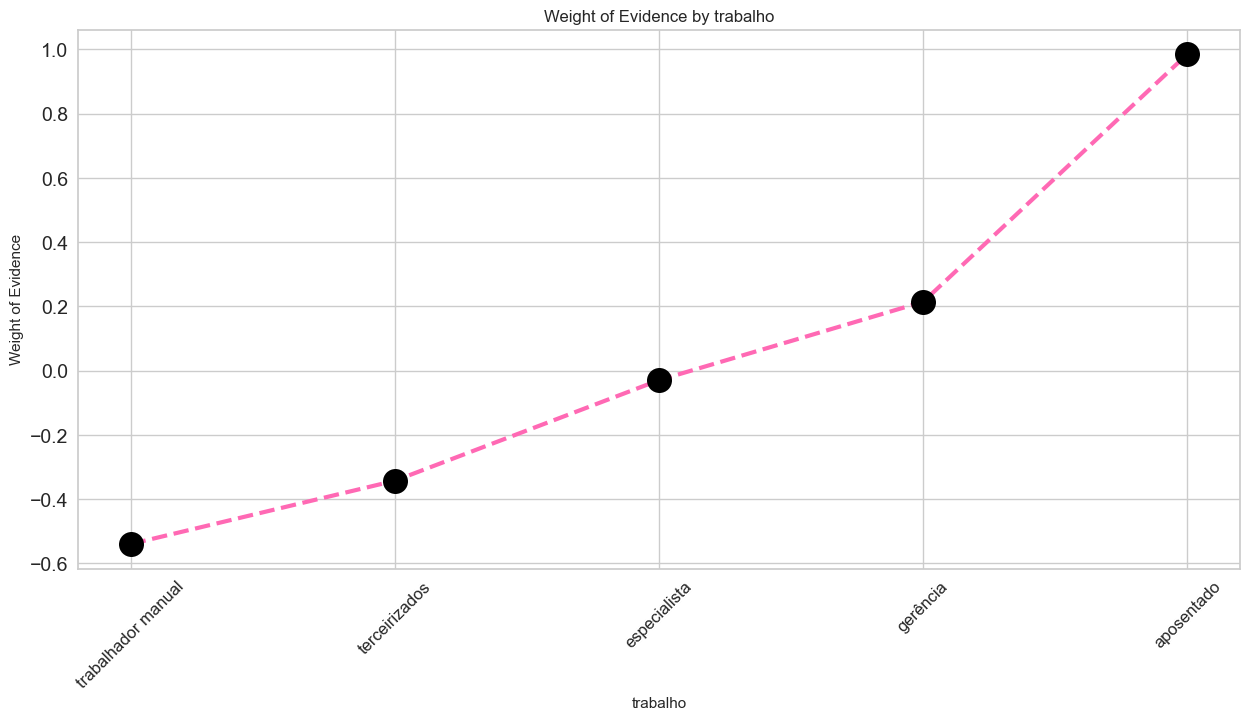

In [166]:
df_grade = my_woe.woe_categorical(df_, 'trabalho', y)
plot_by_woe(df_grade, 45)

In [146]:
df_['trabalho'].unique()

array(['escritório', 'trabalhador manual', 'especialista', 'do lar',
       'empreendedor', 'terceirizados', 'aposentado', 'gerência',
       'desempregado', nan], dtype=object)

In [165]:
df_ = df3_train.copy() 
_f1 = ['escritório', 'gerência', 'desempregado']
_f2 = ['empreendedor', 'especialista', 'do lar']

df_['trabalho'][df_['trabalho'].isin(_f1)] = 'gerência'
df_['trabalho'][df_['trabalho'].isin(_f2)] = 'especialista'

_, __ = my_woe.iv_woe(df_[['trabalho', target]], target, show_woe=True)


Valor da informação de trabalho é 0.139673


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,trabalho,aposentado,281,158,0.089215,123,0.033315,0.985035,0.055063
1,trabalho,especialista,1401,445,0.251270,956,0.258938,-0.030060,0.000230
2,trabalho,gerência,2101,783,0.442123,1318,0.356988,0.213886,0.018209
3,trabalho,terceirizados,508,129,0.072840,379,0.102654,-0.343100,0.010229
4,trabalho,trabalhador manual,1172,256,0.144551,916,0.248104,-0.540215,0.055941


<p style="color: black; font-family: Arial Black">Estado civil</p> 

In [168]:
_, __ = my_woe.iv_woe(df_[['estado civil', target]], target, show_woe=True)


Valor da informação de estado civil é 0.026986


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,estado civil,casado(a),3305,1005,0.532591,2300,0.607662,-0.131864,0.009899
1,estado civil,divorciado(a),612,205,0.108638,407,0.107530,0.010254,0.000011
2,estado civil,solteiro(a),1755,677,0.358771,1078,0.284808,0.230866,0.017075


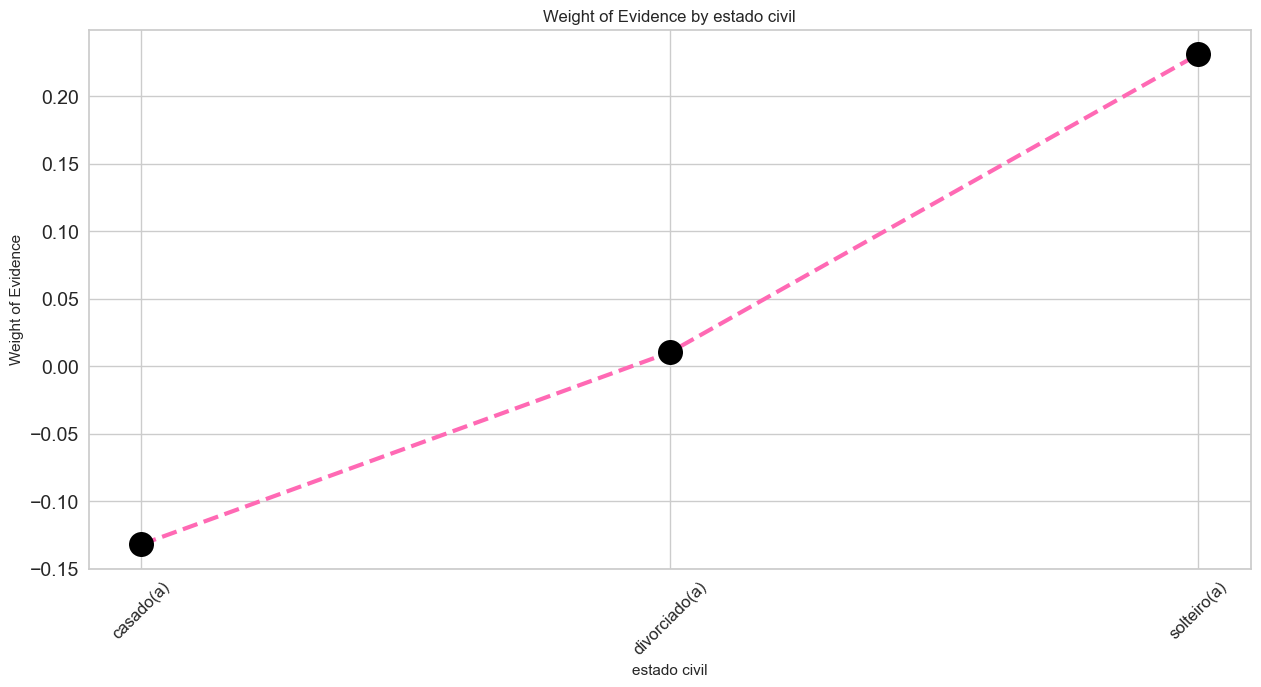

In [170]:
plot_by_woe(my_woe.woe_categorical(df_, 'estado civil', y), 45)

In [171]:
df3_train['estado civil'].unique()

array(['casado(a)', 'solteiro(a)', 'divorciado(a)', nan], dtype=object)

In [175]:
df_ = df3_train.copy() 
_f1 = ['solteiro(a)', 'divorciado(a)']
df_['estado civil'][df_['estado civil'].isin(_f1)] = 'solteiro(a)'

In [176]:
_, __ = my_woe.iv_woe(df_[['estado civil', target]], target, show_woe=True)


Valor da informação de estado civil é 0.023042


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,estado civil,casado(a),3305,1005,0.532591,2300,0.607662,-0.131864,0.009899
1,estado civil,solteiro(a),2367,882,0.467409,1485,0.392338,0.175080,0.013143


<p style="color: black; font-family: Arial Black">educação</p> 

In [179]:
_, __ = my_woe.iv_woe(df_[['educação', target]], target, show_woe=True)


Valor da informação de educação é 0.042039


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,educação,básico,1676,458,0.255295,1218,0.333790,-0.268091,0.021044
1,educação,ensino médio,1272,417,0.232441,855,0.234311,-0.008010,0.000015
2,educação,ensino técnico,712,230,0.128205,482,0.132091,-0.029859,0.000116
3,educação,graduação,1783,689,0.384058,1094,0.299808,0.247651,0.020865


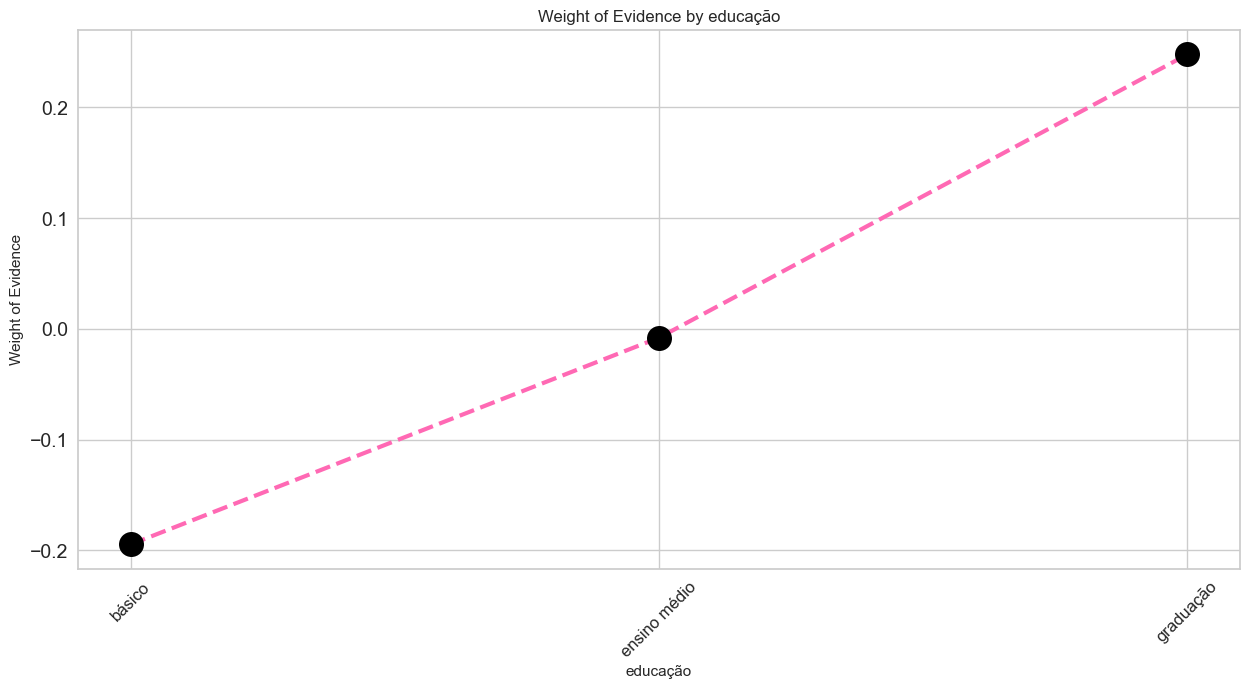

In [185]:
plot_by_woe(my_woe.woe_categorical(df_, 'educação', y), 45)

In [178]:
df3_train['educação'].unique()

array(['ensino médio', 'básico', nan, 'ensino técnico', 'graduação'],
      dtype=object)

In [183]:
df_ = df3_train.copy() 
_f1 = ['básico', 'ensino técnico']
df_['educação'][df_['educação'].isin(_f1)] = 'básico'

_, __ = my_woe.iv_woe(df_[['educação', target]], target, show_woe=True)


Valor da informação de educação é 0.03691


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,educação,básico,2388,688,0.383501,1700,0.465881,-0.194589,0.016030
1,educação,ensino médio,1272,417,0.232441,855,0.234311,-0.008010,0.000015
2,educação,graduação,1783,689,0.384058,1094,0.299808,0.247651,0.020865


<p style="color: black; font-family: Arial Black">ncontatos</p> 

In [194]:
_, _ = my_woe.iv_woe(df_[['ncontatos', target]], target, show_woe=True)


Valor da informação de ncontatos é 0.04608


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,ncontatos,"(0.999, 2.0]",3994,1426,0.752904,2568,0.677394,0.105685,0.007980
1,ncontatos,"(2.0, 3.0]",707,235,0.124076,472,0.124505,-0.003455,0.000001
2,ncontatos,"(3.0, 5.0]",568,145,0.076558,423,0.111580,-0.376700,0.013193
3,ncontatos,"(5.0, 42.0]",416,88,0.046463,328,0.086521,-0.621738,0.024906


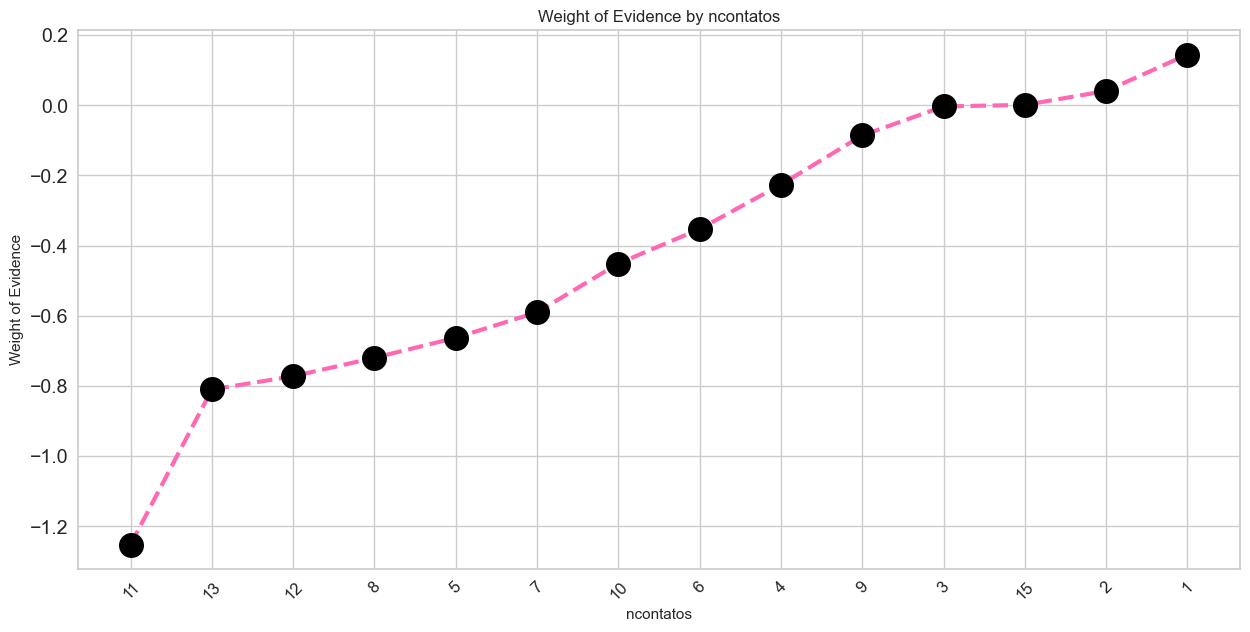

In [193]:
plot_by_woe(my_woe.woe_categorical(df_, 'ncontatos', y), 45)

In [220]:
_, __ = my_woe.iv_woe(df3_train[['ncontatos', target]], target, show_woe=True)


Valor da informação de ncontatos é 0.04608


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,ncontatos,"(0.999, 2.0]",3994,1426,0.752904,2568,0.677394,0.105685,0.007980
1,ncontatos,"(2.0, 3.0]",707,235,0.124076,472,0.124505,-0.003455,0.000001
2,ncontatos,"(3.0, 5.0]",568,145,0.076558,423,0.111580,-0.376700,0.013193
3,ncontatos,"(5.0, 42.0]",416,88,0.046463,328,0.086521,-0.621738,0.024906


In [245]:
df_ = df3_train.copy() 

df_['ncontatos_group'] = 'na'
df_['ncontatos_group'][(df_['ncontatos']<=2)]                          = '(0.999, 2.0]'
df_['ncontatos_group'][(df_['ncontatos'] >2) & (df_['ncontatos']<=3)]  = '(2.0, 3.0]'
df_['ncontatos_group'][(df_['ncontatos'] >3) & (df_['ncontatos']<=5)]   = '(3.0, 5.0]'
df_['ncontatos_group'][(df_['ncontatos'] >5) & (df_['ncontatos']<=42)] = '(5.0, 42.0]'

_, __ = my_woe.iv_woe(df_[['ncontatos_group', target]], target, show_woe=True)


Valor da informação de ncontatos_group é 0.04608


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,ncontatos_group,"(0.999, 2.0]",3994,1426,0.752904,2568,0.677394,0.105685,0.007980
1,ncontatos_group,"(2.0, 3.0]",707,235,0.124076,472,0.124505,-0.003455,0.000001
2,ncontatos_group,"(3.0, 5.0]",568,145,0.076558,423,0.111580,-0.376700,0.013193
3,ncontatos_group,"(5.0, 42.0]",416,88,0.046463,328,0.086521,-0.621738,0.024906



<p style="color: black; font-family: Arial Black">anterior </p> 

In [246]:
_, _ = my_woe.iv_woe(df_[['anterior', target]], target, show_woe=True)


Valor da informação de anterior é 0.399224


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,anterior,apenas um,789,402,0.212249,387,0.102084,0.731966,0.080637
1,anterior,mais de um,273,229,0.120908,44,0.011606,2.343471,0.256145
2,anterior,nenhum,4623,1263,0.666843,3360,0.886310,-0.284512,0.062441


## 3.1. Split train/test

In [248]:
def bin_woe(df_): 
    
    df_['idade_group'] = 'Maio_ou_60' 
    df_['idade_group'][df_['idade']<=29] = 'Menor_29'
    df_['idade_group'][(df_['idade']>29) & (df_['idade']<=35)] = 'Entre_29_35'
    df_['idade_group'][(df_['idade']>35) & (df_['idade']<=45)] = 'Acima_35_e_Menor_Igual_45'
    df_['idade_group'][(df_['idade']>45) & (df_['idade']<=55)] = 'Acima_45_e_Menor_Igual_55'
    df_['idade_group'][(df_['idade']>57)]= 'Acima_57'
    
    _f1 = ['escritório', 'gerência', 'desempregado']
    _f2 = ['empreendedor', 'especialista', 'do lar']

    df_['trabalho'][df_['trabalho'].isin(_f1)] = 'gerência'
    df_['trabalho'][df_['trabalho'].isin(_f2)] = 'especialista'

    _f1 = ['solteiro(a)', 'divorciado(a)']
    df_['estado civil'][df_['estado civil'].isin(_f1)] = 'solteiro(a)'
    
    df_['ncontatos_group'] = 'na'
    df_['ncontatos_group'][(df_['ncontatos']<=2)]                          = '(0.999, 2.0]'
    df_['ncontatos_group'][(df_['ncontatos'] >2) & (df_['ncontatos']<=3)]  = '(2.0, 3.0]'
    df_['ncontatos_group'][(df_['ncontatos'] >3) & (df_['ncontatos']<=5)]   = '(3.0, 5.0]'
    df_['ncontatos_group'][(df_['ncontatos'] >5) & (df_['ncontatos']<=42)] = '(5.0, 42.0]'

    df_.drop(['idade', 'ncontatos'], axis=1, inplace=True)
    
    return df_

In [255]:
df3_train = df2_train.copy()
df3_test  = df2_test.copy()
X         = df2_train.drop(target, axis=1)
y         = df2_train[target].map({'sim':1, 'não':0})
X_test    = df2_test.copy()

df3_train[target]= df3_train[target].map({'sim':1, 'não':0}) 

X_pipeline       = bin_woe(X.copy())
X_test_pipeline  = bin_woe(X_test.copy())
X                = bin_woe(X)
X_test           = bin_woe(X_test)

X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, 
                     test_size    = 0.2,
                     shuffle      = True, 
                     random_state = seed)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape , X_test.shape

((4548, 13), (4548,), (1137, 13), (1137,), (3300, 13))

## 3.1. Pipeline

Vamos criar uma função para tratamento e geração das novas variáveis. 

In [256]:
seed             = 12359
counter          = Counter(y)
scale_pos_weight = (counter[0]/counter[1]) 

params_xgb  = {
    'objective'        : 'binary:logistic', 
    'eval_metric'      : ['error', 'logloss'],
    'max_depth'        : 4, 
    'scale_pos_weight' : scale_pos_weight,
    'n_estimators'     : 500,    
    'learning_rate'    : .1,
    'colsample_bytree' : .75,    
    'subsample'        : .8,
    'reg_lambda'       : 100,
    'n_jobs'           : -1,    
    'seed'             : seed}
    
if torch.cuda.is_available():           
    params_xgb.update({'tree_method': 'gpu_hist','predictor': 'gpu_predictor'})

# Classificadores
model_xgb  = xgb.XGBClassifier(**params_xgb)

In [258]:
cols_oho = ['trabalho', 'estado civil','atraso', 'casa', 'empréstimo', 'contato', 'anterior', 'ncontatos_group'] 
cols_ord = ['educação', 'mês', 'dia', 'duração', 'idade_group']

In [259]:
# Preprocessing data:
numerical_transformer = SimpleImputer(strategy='constant')
ordEncoder = OrdinalEncoder()

categorical_transformer = Pipeline(steps=[
    ('imp',SimpleImputer(strategy='constant', fill_value='No Data')),
    ('OHen',OneHotEncoder(handle_unknown='ignore',sparse=False))
])

categorical_ord_transformer = Pipeline(steps=[
    ('imp',SimpleImputer(strategy='constant', fill_value='No Data')),
    ('Ord',ordEncoder)
])

processor=ColumnTransformer(
    transformers=[    
        ('ord', categorical_ord_transformer, cols_ord),
        ('cat', categorical_transformer, cols_oho)
        ], remainder='drop', sparse_threshold=0.3
    )


percentage = .5
over       = SMOTE(sampling_strategy='minority', k_neighbors=5, n_jobs=-1, random_state=seed) 
under      = RandomUnderSampler(sampling_strategy='all', random_state=seed) 

# Processamento
scaler            = ('preprocessor', StandardScaler())
variancethreshold = ('variancethreshold', VarianceThreshold(threshold=0.02)) 
selectpercentile  = ('selectpercentile', SelectPercentile(f_classif, percentile=85))
selectKbest       = ('SelectKBest', SelectKBest(score_func=f_classif, k=12))

# Pipelne 
pipeline_processor = Pipeline(steps=[('processor', processor), 
                                     #('sampler_over',  over), 
                                     #('sampler_under', under),   
                                     variancethreshold, 
                                     selectpercentile, 
                                     scaler])

pipeline_xgb = Pipeline(steps=[('processor', pipeline_processor),
                               ('model', model_xgb)])
pipeline_xgb

Pipeline(steps=[('processor',
                 Pipeline(steps=[('processor',
                                  ColumnTransformer(transformers=[('ord',
                                                                   Pipeline(steps=[('imp',
                                                                                    SimpleImputer(fill_value='No '
                                                                                                             'Data',
                                                                                                  strategy='constant')),
                                                                                   ('Ord',
                                                                                    OrdinalEncoder())]),
                                                                   ['educação',
                                                                    'mês',
                                                                    'dia',
                                                                    'duração',
                                                                    'idade_group']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imp',
                                                                                    SimpleImputer(fill_value='No '
                                                                                                             'Data',
                                                                                                  strategy='constant')),
                                                                                   ('OHen'...
                               gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=4,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=500, n_jobs=-1,
                               num_parallel_tree=None, predictor=None,
                               random_state=None, reg_alpha=None,
                               reg_lambda=100, ...))])

In [260]:
%%time 

models = [('XGB-1', pipeline_xgb, 1, 'xgb_fe_05_pipe_line', pipeline_processor, 15)]
    
mdl_list_fit, df_pred_tr, df_pred_ts, df_score_mdl = \
    model_cv_fit(models_       = models, 
                 X_            = X_pipeline,
                 y_            = y, 
                 X_test_       = X_test_pipeline,                  
                 path_         = path, 
                 seed_         = seed,
                 target_       = target,
                 create_sub_   = True, 
                 n_splits_     = 10,
                 print_report_ = True
                )

# F1-score: 0.73327 - F1-Train: 0.76660 - L.Loss: 0.41987 - 0h 0m 8s


=> XGB-1
Fold 1 => F1-score: 0.74827 - F1-Train: 0.77001 - AUC:0.82068 - L.Loss: 0.40912 - 0h 0m 0s
Fold 2 => F1-score: 0.71171 - F1-Train: 0.77110 - AUC:0.78914 - L.Loss: 0.44847 - 0h 0m 0s
Fold 3 => F1-score: 0.72517 - F1-Train: 0.76799 - AUC:0.79970 - L.Loss: 0.43118 - 0h 0m 0s
Fold 4 => F1-score: 0.73636 - F1-Train: 0.76698 - AUC:0.81022 - L.Loss: 0.41023 - 0h 0m 0s
Fold 5 => F1-score: 0.74607 - F1-Train: 0.76779 - AUC:0.81943 - L.Loss: 0.39947 - 0h 0m 0s
Fold 6 => F1-score: 0.72210 - F1-Train: 0.77126 - AUC:0.80062 - L.Loss: 0.44523 - 0h 0m 0s
Fold 7 => F1-score: 0.74365 - F1-Train: 0.77086 - AUC:0.81643 - L.Loss: 0.40940 - 0h 0m 0s
Fold 8 => F1-score: 0.70588 - F1-Train: 0.76966 - AUC:0.78473 - L.Loss: 0.45101 - 0h 0m 0s
Fold 9 => F1-score: 0.73286 - F1-Train: 0.76730 - AUC:0.80583 - L.Loss: 0.41679 - 0h 0m 0s
Fold 10 => F1-score: 0.75814 - F1-Train: 0.76411 - AUC:0.82831 - L.Loss: 0.40170 - 0h 0m 0s
-------------------------------------------------------------------------------

,score
XGB-1,0.73302



CPU times: total: 1min 7s
Wall time: 8.99 s


## 3.2. Cluster 

### 3.3.1. PCA
Para o processo de geração dos clustering vamos utilizar O PCA, fazendo uma redução de dimencionalidade com isso vamos reduzir a variancia dos dados.

: [0.13 0.22 0.3  0.37 0.44 0.51 0.57 0.63 0.68 0.72 0.77 0.81]


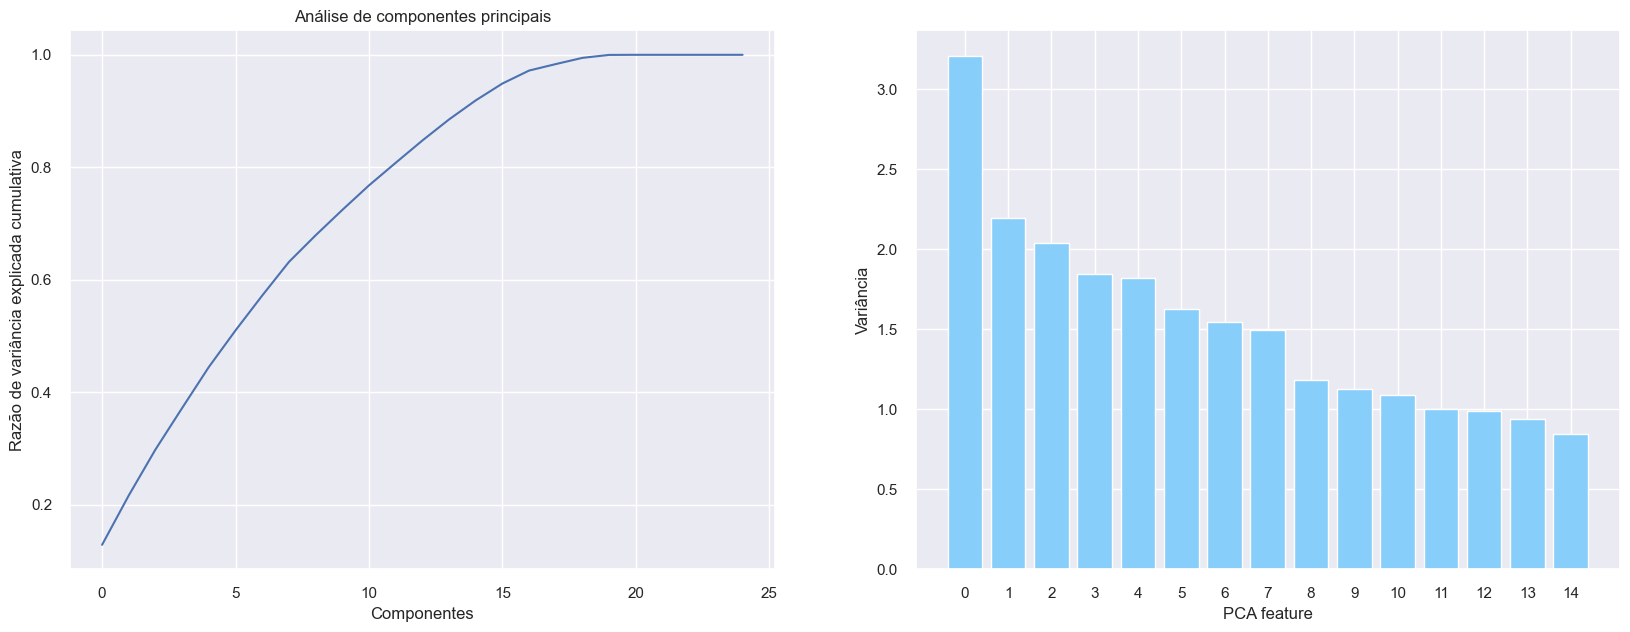

In [273]:
df_pca_tr    = pipeline_processor.fit_transform(X_pipeline, y)
df_pca_ts    = pipeline_processor.transform(X_test)
pca          = PCA(random_state=seed)
pipeline_pca = pca.fit_transform(df_pca_tr)

pca           = ('pca', PCA(random_state=seed))
pipeline_pca  = Pipeline(steps=[('p', pipeline_processor), pca])
Xt            = pipeline_pca.fit_transform(X_pipeline, y);

plt.figure(figsize=(20,7))

features = range(pipeline_pca['pca'].n_components_)
print(':', pipeline_pca['pca'].explained_variance_ratio_.cumsum()[:12].round(2));

plt.subplot(1,2,1)
plt.plot(pipeline_pca['pca'].explained_variance_ratio_.cumsum())
plt.title('Análise de componentes principais')
plt.xlabel('Componentes')
plt.ylabel('Razão de variância explicada cumulativa');


plt.subplot(1,2,2)
plt.bar(features[:15], pipeline_pca['pca'].explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variância')
plt.xticks(features[:15]);

In [274]:
%%time 

n_components  = 2
pca_feats     = [f'fe_pca_{i}' for i in range(n_components)]
pca           = ('pca', PCA(n_components=n_components, random_state=seed))
pipeline_pca  = Pipeline(steps=[('p', pipeline_processor), pca])

df_pca = pd.DataFrame(pipeline_pca.fit_transform(X_pipeline, y), columns=pca_feats)
df_pca.head()

CPU times: total: 46.9 ms
Wall time: 51 ms


,fe_pca_0,fe_pca_1
0,1.313094,-0.394848
1,2.794599,1.048085
2,1.651916,0.386836
3,-0.920524,-1.062628
4,-3.251755,0.403712


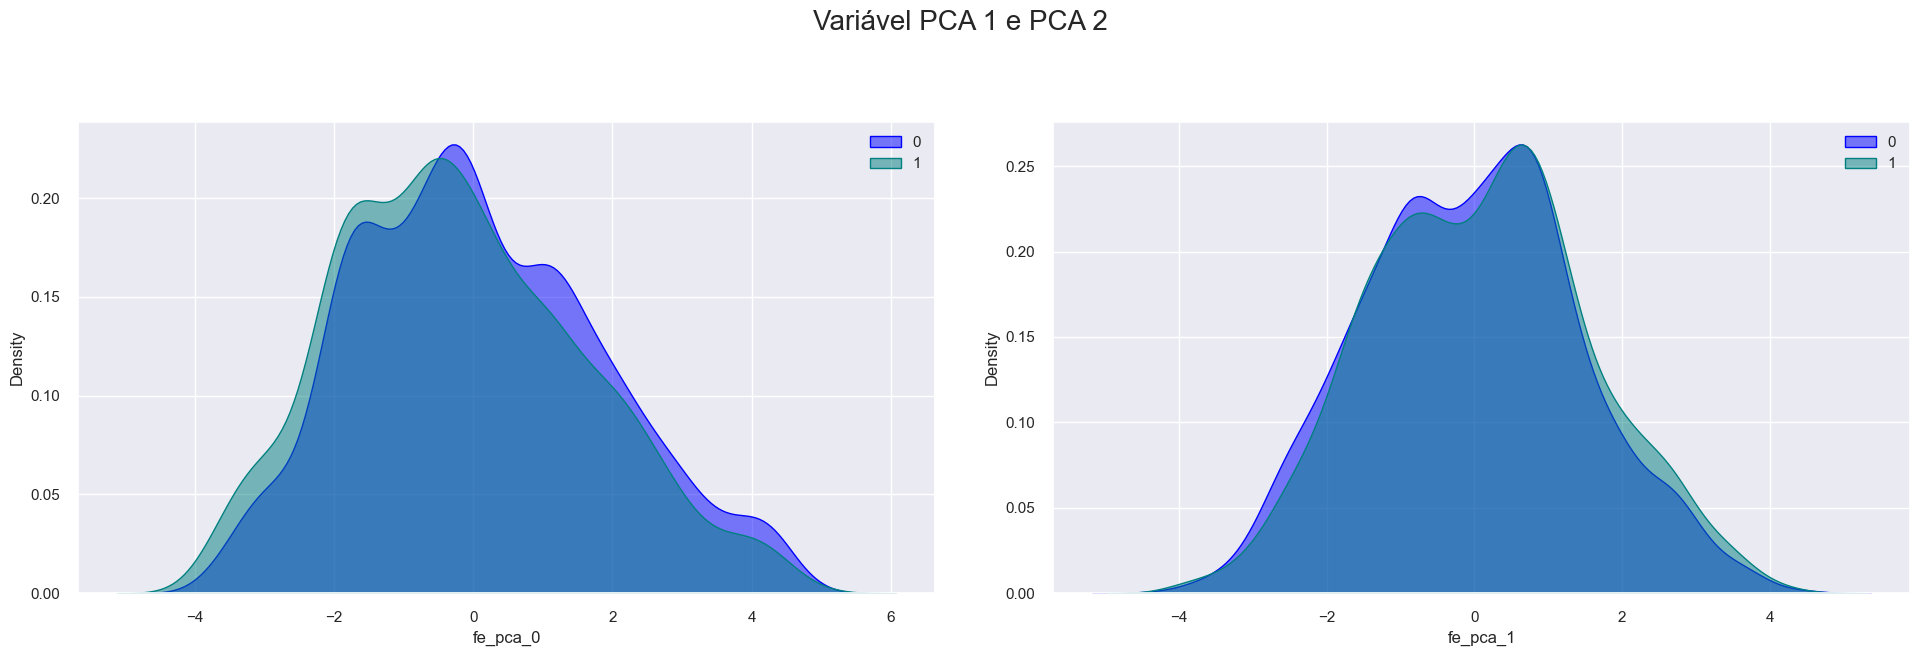

In [275]:
plt.figure(figsize=(20,7))

_         = df_pca.copy() 
_[target] = y 

for i,feature in enumerate(pca_feats):
    plt.subplot(1,2,i+1)
    sns.kdeplot(_[_[target]==0][feature],color='blue', alpha=0.5, label='0', shade=True)
    sns.kdeplot(_[_[target]==1][feature],color='teal', alpha=0.5, label='1', shade=True)  
    plt.xlabel(feature, fontsize=12)
    plt.legend()
         
plt.suptitle('Variável PCA 1 e PCA 2', fontsize=20)
plt.tight_layout(pad=3.0);

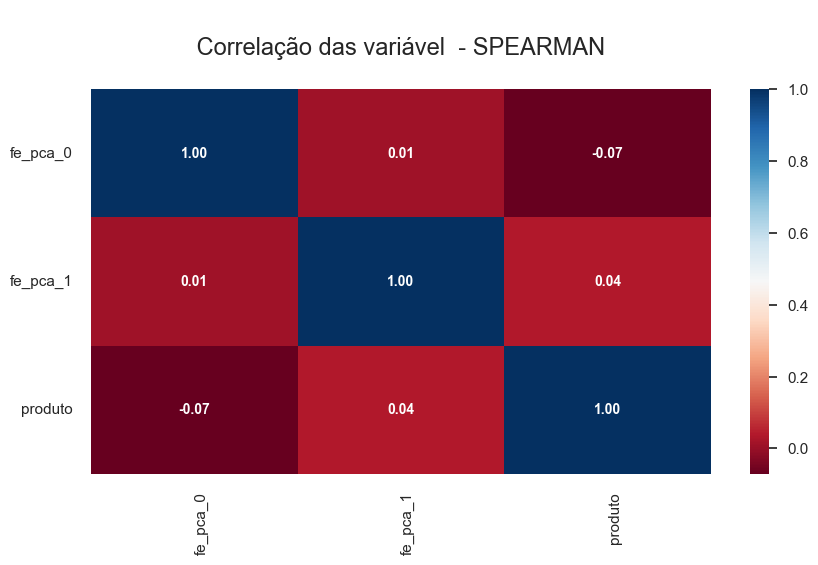

In [276]:
plt.figure(figsize=(10,5))
feature_corr = \
    utility.graf_feature_corr(df_         = _,                             
                              annot_      = True, 
                              threshold_  = .8, 
                              print_var_  = False, 
                              print_graf_ = True, 
                              mask_       = False, 
                              method_     = 'spearman');

In [265]:
df_pca_tr    = pipeline_processor.fit_transform(X_pipeline, y)
df_pca_ts    = pipeline_processor.transform(X_test)
pca          = PCA(random_state=seed)
pipeline_pca = pca.fit_transform(df_pca_tr)

pca           = ('pca', PCA(random_state=seed))
pipeline_pca  = Pipeline(steps=[('p', pipeline_processor), pca])
pipeline_pca.fit(X_pipeline, y);

In [278]:
pca_data = pd.DataFrame({
    'Features': pipeline_processor.get_feature_names_out(X_pipeline.columns),
    'PC1': pipeline_pca['pca'].components_[0],
    'PC2': pipeline_pca['pca'].components_[1]
})

pca_data.sort_values(by='PC1',ascending=False)

pca_data.head()

,Features,PC1,PC2
0,ord__educação,-0.219679,-0.147586
1,ord__mês,0.010123,0.009507
2,ord__duração,-0.063137,0.091360
3,ord__idade_group,-0.166146,-0.148738
4,cat__trabalho_No Data,-0.097040,-0.069711


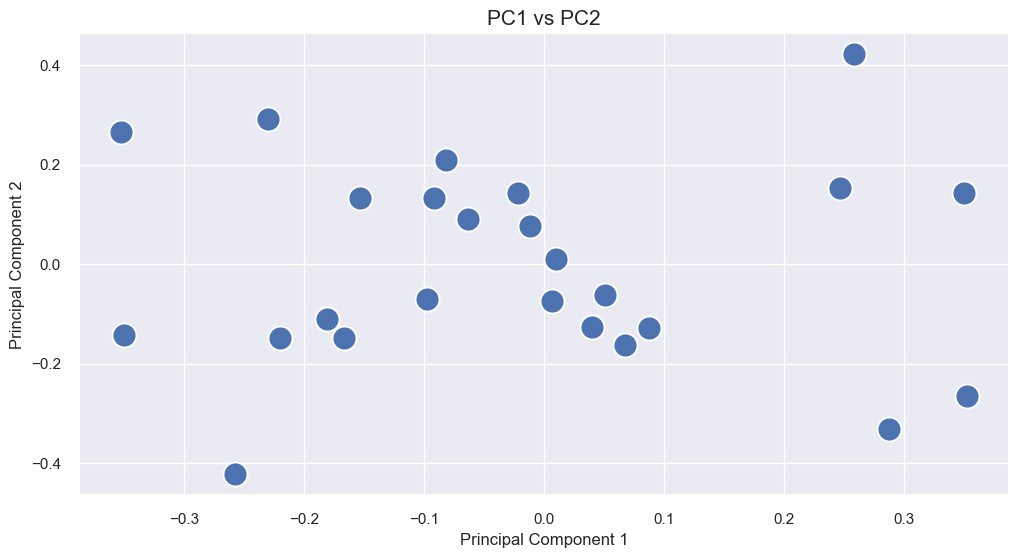

In [279]:
#Visualize 2 main PCs
fig = plt.figure(figsize = (12,6))
sns.scatterplot(data=pca_data, x='PC1', y='PC2', marker='o', s=300)

plt.title('PC1 vs PC2',fontsize=15)
plt.xlabel('Principal Component 1',fontsize=12)
plt.ylabel('Principal Component 2',fontsize=12)
plt.show()

In [287]:
n_components  = 1
pca_feats     = [f'fe_pca_{i}' for i in range(n_components)]
pca           = ('pca', PCA(n_components=n_components, random_state=seed))
pipeline_pca  = Pipeline(steps=[('p', pipeline_processor), pca])

pipeline_pca.fit(X_pipeline, y)

X_pipeline_pca      = X_pipeline.copy()
X_test_pipeline_pca = X_test_pipeline.copy()

X_pipeline_pca[pca_feats]      = pipeline_pca.transform(X_pipeline)
X_test_pipeline_pca[pca_feats] = pipeline_pca.transform(X_test_pipeline_pca)

X_pipeline_pca.head()

,trabalho,estado civil,educação,atraso,casa,empréstimo,contato,mês,dia,duração,anterior,idade_group,ncontatos_group,fe_pca_0
0,gerência,casado(a),ensino médio,não,não,não,telefone fixo,junho,quinta-feira,média,nenhum,Acima_35_e_Menor_Igual_45,"(0.999, 2.0]",1.312926
1,trabalhador manual,casado(a),básico,NaN,não,não,telefone móvel,julho,terça-feira,média,nenhum,Entre_29_35,"(3.0, 5.0]",2.793892
2,especialista,casado(a),NaN,não,sim,não,telefone fixo,maio,segunda-feira,longa,nenhum,Acima_45_e_Menor_Igual_55,"(0.999, 2.0]",1.651909
3,especialista,solteiro(a),NaN,não,não,não,telefone móvel,outubro,terça-feira,longa,nenhum,Menor_29,"(0.999, 2.0]",-0.920503
4,gerência,solteiro(a),ensino técnico,não,NaN,NaN,telefone móvel,junho,quinta-feira,média,apenas um,Entre_29_35,"(0.999, 2.0]",-3.251812


In [288]:
num_transformer = Pipeline(steps=[    
    ('imputer', SimpleImputer(strategy='median')),
    #('featre_pca',ordEncoder)
])

processor_pca =ColumnTransformer(
    transformers=[            
        ('ord', categorical_ord_transformer, cols_ord),
        ('cat', categorical_transformer, cols_oho),
        ('num', num_transformer, pca_feats)
        ], 
    remainder='drop', 
    sparse_threshold=0.3
    )

# Pipelne 
pipeline_processor_pca = Pipeline(steps=[
    ('processor',processor_pca),
     variancethreshold, 
     selectpercentile, 
     scaler])


pipeline_xgb_pca = Pipeline(steps=[
    ('processor', pipeline_processor_pca),
    ('model', model_xgb)
])

pipeline_xgb_pca

Pipeline(steps=[('processor',
                 Pipeline(steps=[('processor',
                                  ColumnTransformer(transformers=[('ord',
                                                                   Pipeline(steps=[('imp',
                                                                                    SimpleImputer(fill_value='No '
                                                                                                             'Data',
                                                                                                  strategy='constant')),
                                                                                   ('Ord',
                                                                                    OrdinalEncoder())]),
                                                                   ['educação',
                                                                    'mês',
                                                                    'dia',
                                                                    'duração',
                                                                    'idade_group']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imp',
                                                                                    SimpleImputer(fill_value='No '
                                                                                                             'Data',
                                                                                                  strategy='constant')),
                                                                                   ('OHen'...
                               eval_metric=['error', 'logloss'], gamma=0,
                               gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=4, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=500, n_jobs=-1, num_parallel_tree=1,
                               predictor='auto', random_state=12359,
                               reg_alpha=0, reg_lambda=100, ...))])

In [289]:
%%time 

models = [('XGB-1', pipeline_xgb_pca, 1, 'xgb_nb_04_pipe_line', pipeline_processor_pca, 15)]
    
mdl_list_fit, df_pred_tr, df_pred_ts, df_score_mdl = \
    model_cv_fit(models_       = models, 
                 X_            = X_pipeline_pca,
                 y_            = y, 
                 X_test_       = X_test_pipeline_pca,                  
                 path_         = path, 
                 seed_         = seed,
                 target_       = target,
                 create_sub_   = True, 
                 n_splits_     = 10,
                 print_report_ = True
                )

# F1-score: 0.73327 - F1-Train: 0.76660 - L.Loss: 0.41987 - 0h 0m 8s
# F1-score: 0.73064 - F1-Train: 0.78430 - L.Loss: 0.42477 - 0h 0m 12s


=> XGB-1
Fold 1 => F1-score: 0.75576 - F1-Train: 0.77244 - AUC:0.82728 - L.Loss: 0.41321 - 0h 0m 1s
Fold 2 => F1-score: 0.71332 - F1-Train: 0.77750 - AUC:0.79046 - L.Loss: 0.44605 - 0h 0m 1s
Fold 3 => F1-score: 0.71854 - F1-Train: 0.77535 - AUC:0.79442 - L.Loss: 0.43380 - 0h 0m 1s
Fold 4 => F1-score: 0.73148 - F1-Train: 0.77321 - AUC:0.80497 - L.Loss: 0.41752 - 0h 0m 1s
Fold 5 => F1-score: 0.74107 - F1-Train: 0.76807 - AUC:0.81547 - L.Loss: 0.39968 - 0h 0m 1s
Fold 6 => F1-score: 0.71648 - F1-Train: 0.77789 - AUC:0.79533 - L.Loss: 0.44843 - 0h 0m 1s
Fold 7 => F1-score: 0.74057 - F1-Train: 0.77564 - AUC:0.81244 - L.Loss: 0.40733 - 0h 0m 1s
Fold 8 => F1-score: 0.71364 - F1-Train: 0.77607 - AUC:0.79133 - L.Loss: 0.45722 - 0h 0m 1s
Fold 9 => F1-score: 0.71599 - F1-Train: 0.77499 - AUC:0.79128 - L.Loss: 0.42345 - 0h 0m 1s
Fold 10 => F1-score: 0.76082 - F1-Train: 0.77090 - AUC:0.83230 - L.Loss: 0.40337 - 0h 0m 1s
-------------------------------------------------------------------------------

,score
XGB-1,0.73077



CPU times: total: 1min 29s
Wall time: 12 s


### 3.3.2. Criação dos clustering

In [290]:
X_pipeline_cluster      = X_pipeline_pca.copy()
X_test_pipeline_cluster = X_test_pipeline_pca.copy()

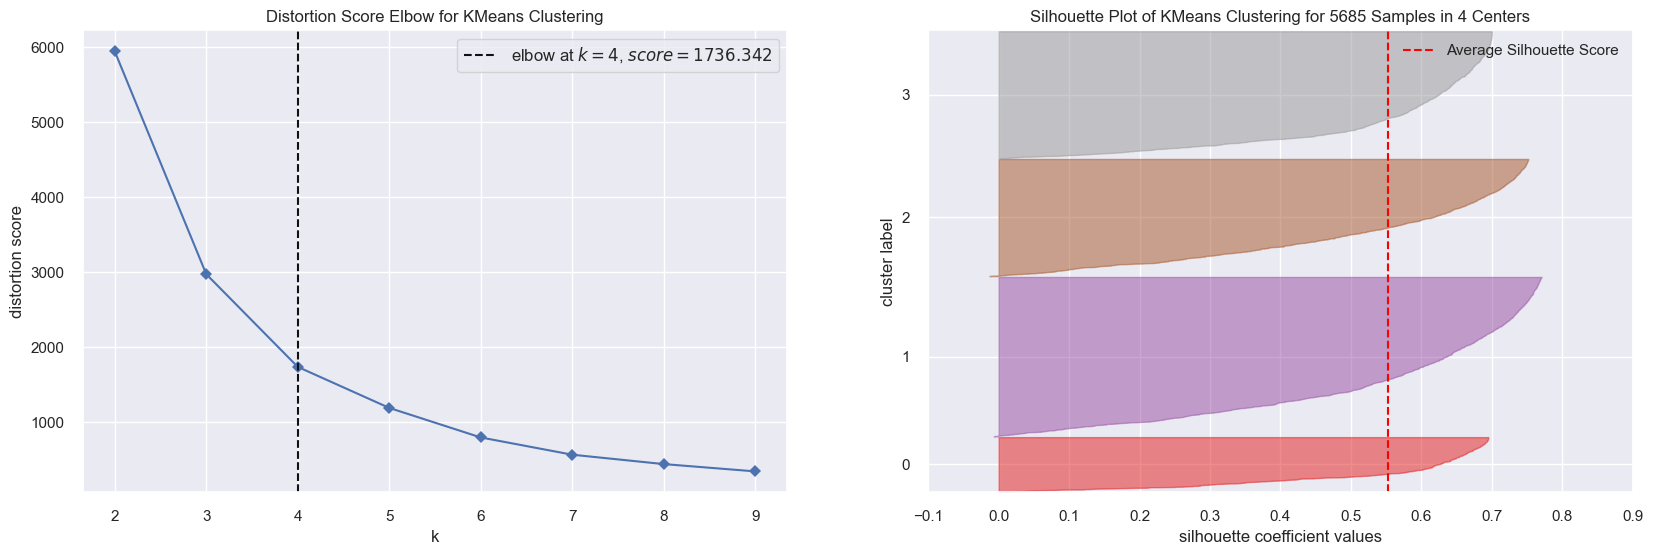

CPU times: total: 5.36 s
Wall time: 1.77 s


<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 5685 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [304]:
%%time 

_ = X_pipeline_pca[pca_feats] 

f1, axs1 = plt.subplots(1,2,figsize=(20,6)) 

visualizer = KElbowVisualizer(KMeans(random_state=seed), k=(2,10), timings=False, ax=axs1[0])
visualizer.fit(_.values)
visualizer.finalize() 

k       = visualizer.elbow_value_
model_2 = KMeans(k, random_state=seed)
sv      = SilhouetteVisualizer(model_2, ax=axs1[1])

sv.fit(_)
sv.show();

<div class="alert alert-block alert-info" style="border-radius:15px">
<p style="color: black; font-family: Arial Black">NOTA:</p>

Utilizando PCA temos os clusters com melhor silhjouette e melhor distribuições em relação ao utilizar todas as variáveis para gera os clusters. 
    
Vamos gerar os clusters nos dados de treino e teste.
    
</div>

In [313]:
%%time 

model_2.fit(X_pipeline_cluster[pca_feats])

X_pipeline_cluster['fe_cluster_kmeans']      = model_2.predict(X_pipeline_cluster[pca_feats])
X_test_pipeline_cluster['fe_cluster_kmeans'] = model_2.predict(X_test_pipeline_cluster[pca_feats])

CPU times: total: 266 ms
Wall time: 58 ms


In [314]:
_  = pd.DataFrame(pipeline_processor_pca.fit_transform(X_pipeline_pca, y))
_.columns =  [f'col_{i}' for i in range(_.shape[1])]
_['fe_cluster_kmeans'] = X_pipeline_cluster['fe_cluster_kmeans'] 

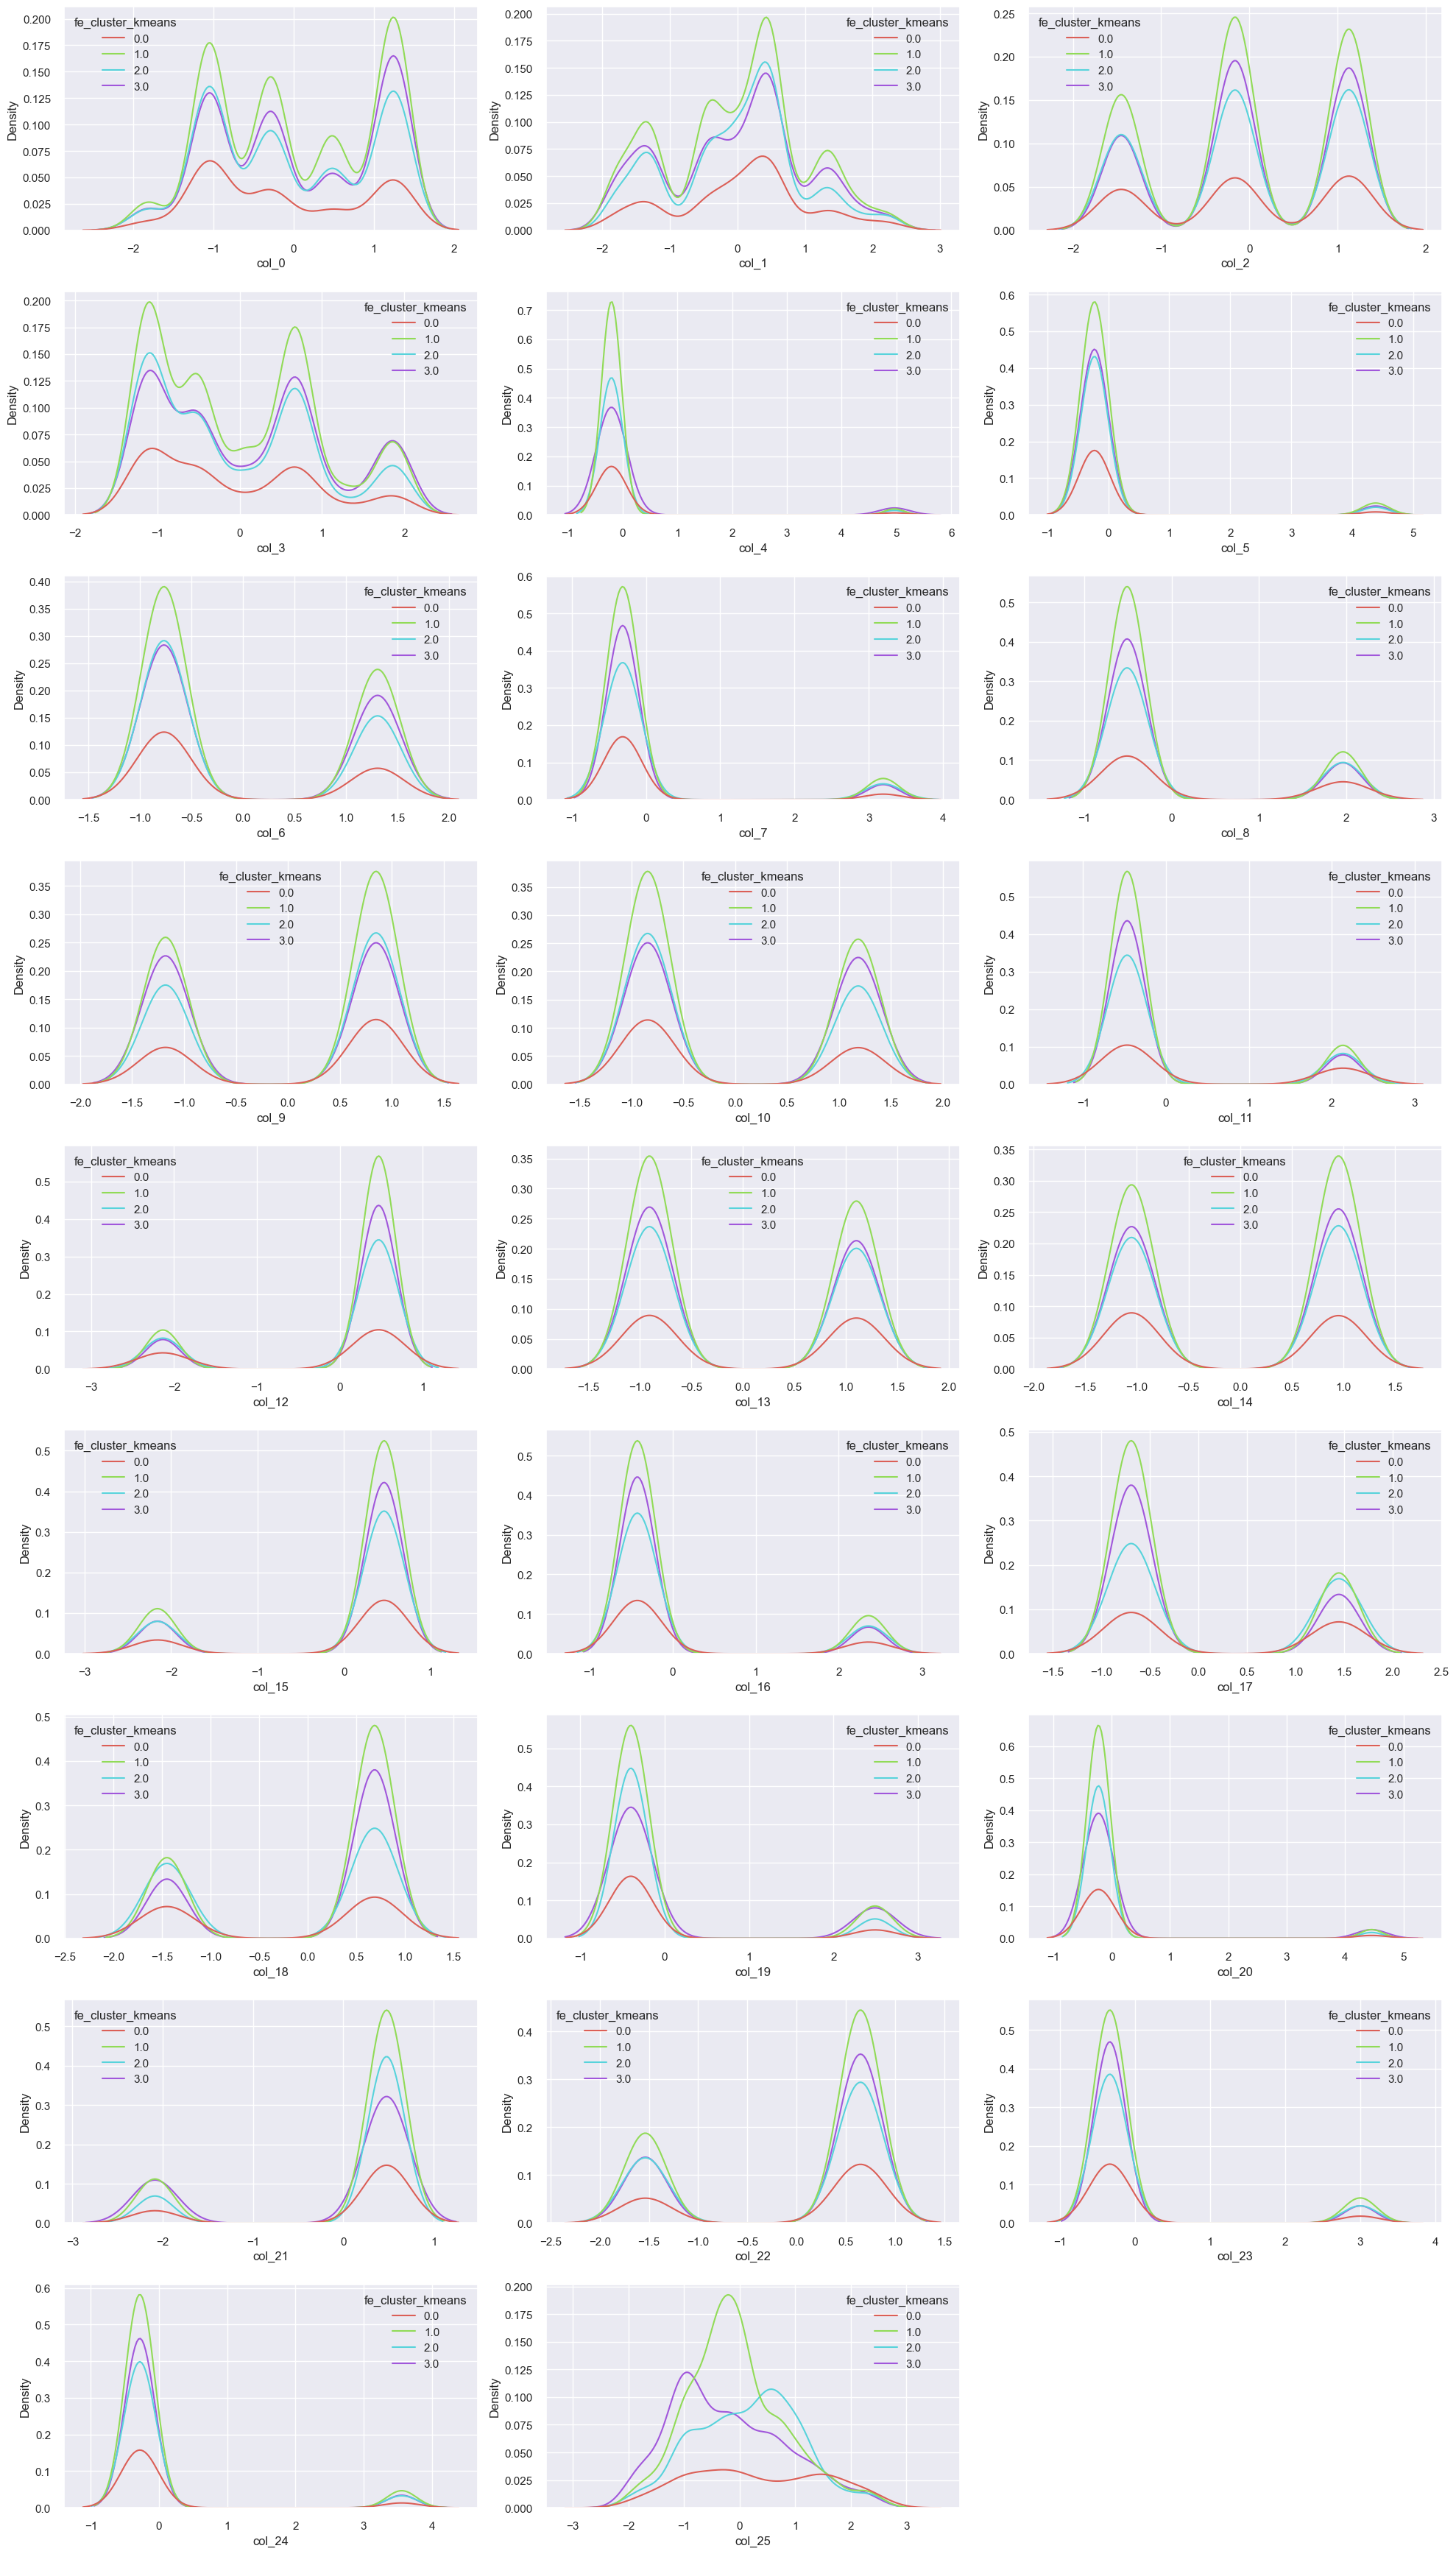

In [307]:
feature_sample = _.columns.to_list()
feature_sample.remove('fe_cluster_kmeans')
row            = int(len(feature_sample)/3) + 1

f,ax = plt.subplots(figsize=(20,35))

for i, feature in enumerate(feature_sample):
    plt.subplot(row, 3 , i+1)
    sns.kdeplot(data=_, x=feature, hue="fe_cluster_kmeans", palette=sns.color_palette("hls", k));
    
plt.tight_layout(pad=1.5);

In [308]:
%%time 
model_bgmm = BayesianGaussianMixture(n_components    = k, 
                                     covariance_type = 'full', 
                                     n_init          = 3,
                                     init_params     = "kmeans",
                                     random_state    = seed) 

model_bgmm.fit(X_pipeline_cluster[pca_feats])

X_pipeline_cluster['fe_cluster_bgmm_pca']      = model_bgmm.predict(X_pipeline_cluster[pca_feats])
X_test_pipeline_cluster['fe_cluster_bgmm_pca'] = model_bgmm.predict(X_test_pipeline_cluster[pca_feats])


CPU times: total: 4.56 s
Wall time: 970 ms


<div class="alert alert-block alert-info" style="border-radius:15px">
<p style="color: black; font-family: Arial Black">NOTA:</p>

Com a criação da variável cluster, tivemos uma melhora no score e a variável se posicionou entre as 10. 
    
</div>

In [309]:
feature_corr = ['fe_pca_0','fe_cluster_kmeans', 'fe_cluster_bgmm_pca', target]

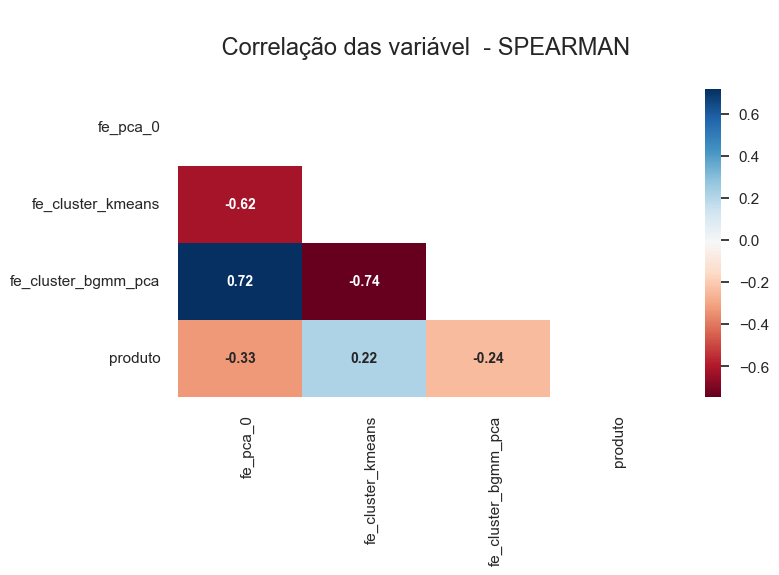

In [310]:
plt.figure(figsize=(8,4))
_ = X_pipeline_cluster.copy() 
_[target] = y

feature_corr = \
    utility.graf_feature_corr(df_         = _[feature_corr],
                              annot_      = True, 
                              threshold_  = .8, 
                              print_var_  = False, 
                              print_graf_ = True, 
                              mask_       = True, 
                              method_     = 'spearman');

Text(0, 0.5, '')

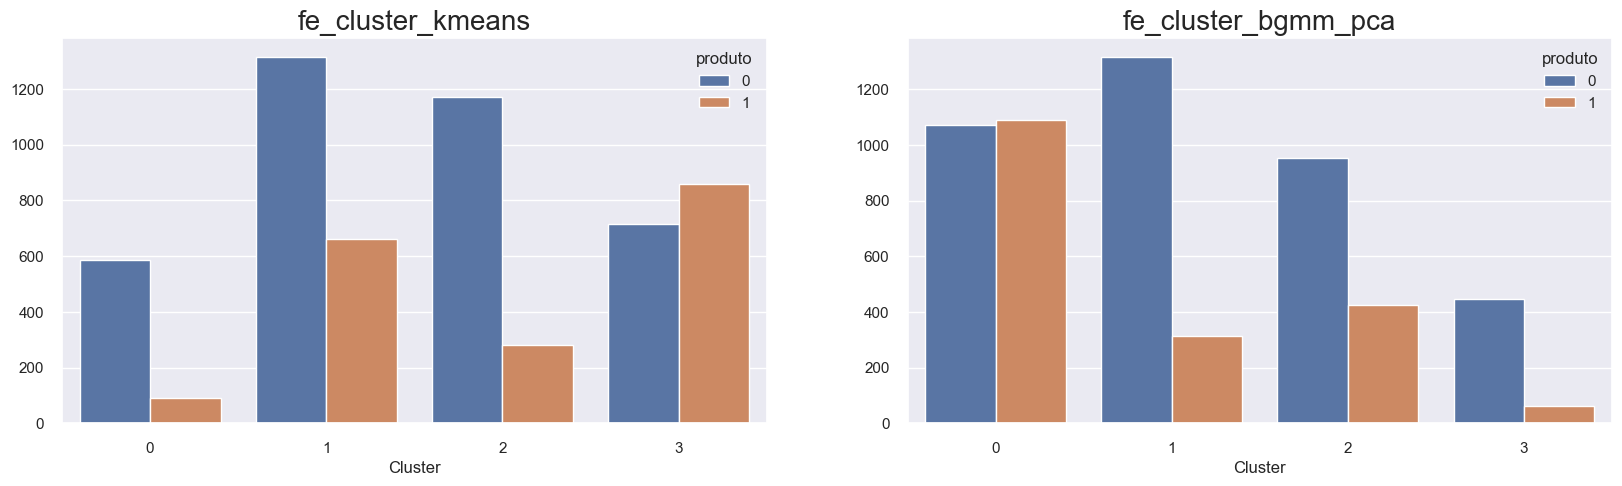

In [318]:
_         =  X_pipeline_cluster
_[target] =  y

sns.set(style="darkgrid")
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(data=_, x='fe_cluster_kmeans', hue=target)
plt.title('fe_cluster_kmeans', fontsize=20)
plt.xlabel('Cluster')
plt.ylabel('')

plt.subplot(1,2,2)
sns.countplot(data=_, x='fe_cluster_bgmm_pca', hue=target)
plt.title('fe_cluster_bgmm_pca', fontsize=20)
plt.xlabel('Cluster')
plt.ylabel('')



### 2.2.4. Transformar em One Hot Encoder

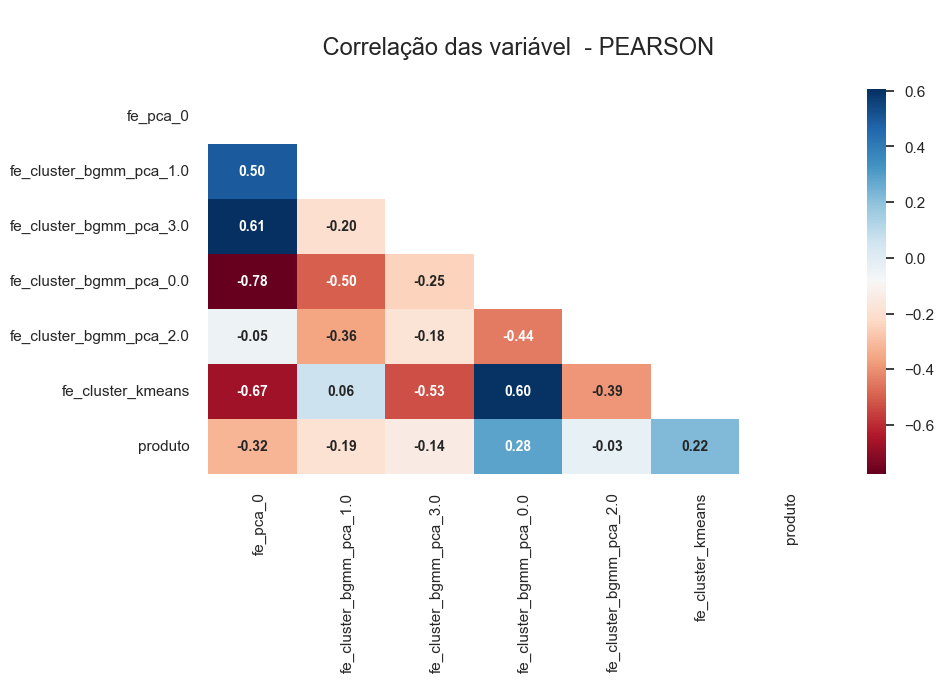

In [320]:
encoder = ce.OneHotEncoder(cols           = ['fe_cluster_bgmm_pca' ],
                           handle_unknown = 'return_nan',
                           return_df      = True,
                           use_cat_names  = True)

encoder.fit(X_pipeline_cluster)

_            = encoder.fit_transform(X_pipeline_cluster)
_[target]    = y
feature_corr = _.filter(regex=r'fe_').columns.to_list()

plt.figure(figsize=(10,5))
feature_corr = \
    utility.graf_feature_corr(df_         = _[feature_corr+ [target]],
                              annot_      = True, 
                              threshold_  = .8, 
                              print_var_  = False, 
                              print_graf_ = True, 
                              mask_       = True, );

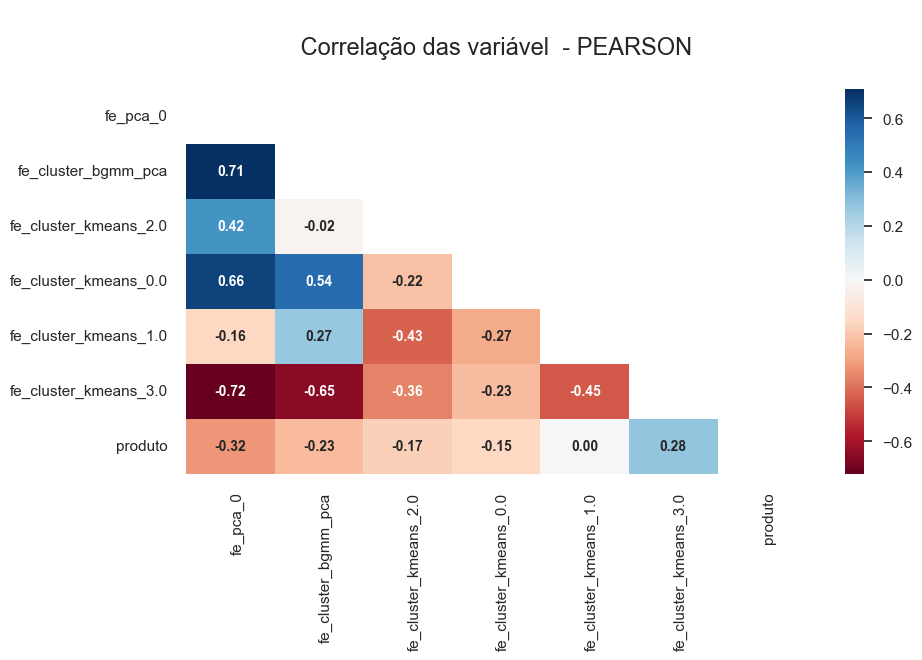

In [321]:
encoder = ce.OneHotEncoder(cols           = ['fe_cluster_kmeans' ],
                           handle_unknown = 'return_nan',
                           return_df      = True,
                           use_cat_names  = True)

encoder.fit(X_pipeline_cluster)

_            = encoder.fit_transform(X_pipeline_cluster)
_[target]    = y
feature_corr = _.filter(regex=r'fe_').columns.to_list()

plt.figure(figsize=(10,5))
feature_corr = \
    utility.graf_feature_corr(df_         = _[feature_corr+ [target]],
                              annot_      = True, 
                              threshold_  = .8, 
                              print_var_  = False, 
                              print_graf_ = True, 
                              mask_       = True, );

In [322]:
X_pipeline_cluster.drop('fe_cluster_kmeans', axis=1, inplace=True)     
X_test_pipeline_cluster.drop('fe_cluster_kmeans', axis=1, inplace=True)

# 4. Modelagem 

In [323]:
X      = X_pipeline_cluster.copy() 
X_test = X_test_pipeline_cluster.copy()

## 4.1 Pipeline 

In [324]:
num_transformer = Pipeline(steps=[    
    ('imputer', SimpleImputer(strategy='median'))
])

processor_final =ColumnTransformer(
    transformers=[            
        ('ord', categorical_ord_transformer, cols_ord),
        ('cat', categorical_transformer, cols_oho + ['fe_cluster_bgmm_pca'] ),
        ('num', num_transformer, pca_feats) 
        ], 
    remainder='drop', 
    sparse_threshold=0.3
    )

# Pipelne 
pipeline_processor_final = Pipeline(steps=[
    ('processor',processor_final),
     variancethreshold, 
     selectpercentile, 
     scaler])

pipeline_xgb_final = Pipeline(steps=[
    ('processor', pipeline_processor_final),
    ('model', model_xgb)
])

pipeline_xgb_final

Pipeline(steps=[('processor',
                 Pipeline(steps=[('processor',
                                  ColumnTransformer(transformers=[('ord',
                                                                   Pipeline(steps=[('imp',
                                                                                    SimpleImputer(fill_value='No '
                                                                                                             'Data',
                                                                                                  strategy='constant')),
                                                                                   ('Ord',
                                                                                    OrdinalEncoder())]),
                                                                   ['educação',
                                                                    'mês',
                                                                    'dia',
                                                                    'duração',
                                                                    'idade_group']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imp',
                                                                                    SimpleImputer(fill_value='No '
                                                                                                             'Data',
                                                                                                  strategy='constant')),
                                                                                   ('OHen'...
                               eval_metric=['error', 'logloss'], gamma=0,
                               gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=4, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=500, n_jobs=-1, num_parallel_tree=1,
                               predictor='auto', random_state=12359,
                               reg_alpha=0, reg_lambda=100, ...))])

In [325]:
_ = pipeline_processor_final.fit_transform(X, y)
_

array([[-0.28523253,  0.00976587,  1.12692251, ..., -0.56644886,
        -0.31358968,  0.73291504],
       [-1.05083541, -0.43086077,  1.12692251, ..., -0.56644886,
         3.18888048,  1.5596345 ],
       [-1.8164383 ,  0.4503925 , -0.16264159, ..., -0.56644886,
        -0.31358968,  0.92214535],
       ...,
       [ 1.24597325, -0.8714874 , -0.16264159, ..., -0.56644886,
        -0.31358968, -1.78882119],
       [-1.05083541,  0.4503925 , -0.16264159, ..., -0.56644886,
         3.18888048,  2.38648788],
       [ 1.24597325,  1.7722724 ,  1.12692251, ...,  1.76538443,
        -0.31358968, -0.29477074]])

## 4.2. Treinamento

In [326]:
%%time 

models = [('XGB-1', pipeline_xgb_final, 1, 'xgb_fe_06_pipe_line', pipeline_processor_final, 15)]
    
mdl_list_fit, df_pred_tr, df_pred_ts, df_score_mdl = \
    model_cv_fit(models_       = models, 
                 X_            = X,
                 y_            = y, 
                 X_test_       = X_test,                  
                 path_         = path, 
                 seed_         = seed,
                 target_       = target,
                 create_sub_   = True, 
                 n_splits_     = 10,
                 print_report_ = True
                )

# F1-score: 0.73327 - F1-Train: 0.76660 - L.Loss: 0.41987 - 0h 0m 8s
# F1-score: 0.73046 - F1-Train: 0.77200 - L.Loss: 0.42523 - 0h 0m 12s
# F1-score: 0.73252 - F1-Train: 0.77101 - L.Loss: 0.42749 - 0h 0m 12s
# F1-score: 0.73399 - F1-Train: 0.77418 - L.Loss: 0.42508 - 0h 0m 11s


=> XGB-1
Fold 1 => F1-score: 0.75751 - F1-Train: 0.77294 - AUC:0.82860 - L.Loss: 0.41315 - 0h 0m 1s
Fold 2 => F1-score: 0.71493 - F1-Train: 0.77885 - AUC:0.79178 - L.Loss: 0.44609 - 0h 0m 1s
Fold 3 => F1-score: 0.72769 - F1-Train: 0.77447 - AUC:0.80233 - L.Loss: 0.43345 - 0h 0m 1s
Fold 4 => F1-score: 0.73782 - F1-Train: 0.77219 - AUC:0.81024 - L.Loss: 0.41704 - 0h 0m 1s
Fold 5 => F1-score: 0.74888 - F1-Train: 0.77024 - AUC:0.82206 - L.Loss: 0.40375 - 0h 0m 1s
Fold 6 => F1-score: 0.71772 - F1-Train: 0.77688 - AUC:0.79666 - L.Loss: 0.44860 - 0h 0m 1s
Fold 7 => F1-score: 0.74353 - F1-Train: 0.77635 - AUC:0.81509 - L.Loss: 0.40743 - 0h 0m 1s
Fold 8 => F1-score: 0.71202 - F1-Train: 0.77411 - AUC:0.79001 - L.Loss: 0.45659 - 0h 0m 1s
Fold 9 => F1-score: 0.71090 - F1-Train: 0.77570 - AUC:0.78733 - L.Loss: 0.42158 - 0h 0m 1s
Fold 10 => F1-score: 0.76888 - F1-Train: 0.77012 - AUC:0.83890 - L.Loss: 0.40309 - 0h 0m 1s
-------------------------------------------------------------------------------

,score
XGB-1,0.73399



CPU times: total: 1min 33s
Wall time: 12.4 s


## 4.3. Tunning

In [ ]:
%%time 

params_xgb  = {
    'max_depth'     : [4, 5, 7],
    'n_estimators'  : [100, 250, 500, 1000],        
    'learning_rate' : [.1, .01, .001, .005], 
    'reg_lambda'    : [30, 50, 100, 200]
    }
        
model_xgb = xgb.XGBClassifier(
    objective        = 'binary:logistic', 
    eval_metric      = ['error', 'logloss'],
    colsample_bytree = .75,    
    subsample        = .8,    
    scale_pos_weight = scale_pos_weight,
    use_label_encoder= False, 
    tree_method      = 'gpu_hist',
    predictor        = 'gpu_predictor', 
    random_state     = seed
)
     
# Usando o constructor para criar o objeto sss
sss = StratifiedShuffleSplit(n_splits     = 5,       # 5 simulações.
                             test_size    = 0.2,     # 20% do dataset será de testes.
                             random_state = seed)    # Permitir a reprodutibilidade.


# Criando um dicionário com as métricas que desejo calcular.
meus_scores = {'accuracy' : make_scorer(accuracy_score),
               'recall'   : make_scorer(recall_score),
               'precision': make_scorer(precision_score),
               'f1'       : make_scorer(fbeta_score, beta=1), 
               'logloss'  : make_scorer(log_loss)}

gs_cv  = []
models = [(model_xgb, params_xgb, 'XGB' )]
   
_ = pipeline_processor_final.fit_transform(X, y)

for mdl in models:
    gs = GridSearchCV(estimator          = mdl[0], 
                      param_grid         = mdl[1], 
                      scoring            = meus_scores,
                      refit              = 'f1',
                      cv                 = sss, 
                      return_train_score = True,
                      n_jobs             = -1)
  
    gs.fit(_, y)

    print("Best parameters for {}: {}".format(mdl[2], gs.best_params_))   
    print()
    gs_cv.append([(mdl[2], gs)])

In [327]:
counter          = Counter(y)
scale_pos_weight = (counter[0]/counter[1]) 

params_xgb  = {
    'objective'        : 'binary:logistic', 
    'eval_metric'      : ['error', 'logloss'],
    'max_depth'        : 5, 
    'scale_pos_weight' : scale_pos_weight,
    'n_estimators'     : 1000,    
    'learning_rate'    : .01,
    'colsample_bytree' : .75,    
    'subsample'        : .8,
    'reg_lambda'       : 30,
    'n_jobs'           : -1,    
    'seed'             : seed}
     
if torch.cuda.is_available():           
    params_xgb.update({'tree_method': 'gpu_hist','predictor': 'gpu_predictor'})

# Classificadores
model_xgb  = xgb.XGBClassifier(**params_xgb)

pipeline_xgb_final_tunning = Pipeline(steps=[
    ('processor', pipeline_processor_final),
    ('model', model_xgb)
])

In [328]:
%%time 

models = [('XGB-1', pipeline_xgb_final_tunning, 1, 'xgb_fe_07_pipe_line', pipeline_processor_final, 15), 
          ('XGB-2', model_xgb   , 4, 'xgb_fe_08_pipe_line', pipeline_processor_final, 15)
         ]
    
mdl_list_fit, df_pred_tr, df_pred_ts, df_score_mdl = \
    model_cv_fit(models_       = models, 
                 X_            = X,
                 y_            = y, 
                 X_test_       = X_test,                  
                 path_         = path, 
                 seed_         = seed,
                 target_       = target,
                 create_sub_   = True, 
                 n_splits_     = 10,
                 print_report_ = True
                )

# F1-score: 0.73327 - F1-Train: 0.76660 - L.Loss: 0.41987 - 0h 0m 8s
# F1-score: 0.73046 - F1-Train: 0.77200 - L.Loss: 0.42523 - 0h 0m 12s
# F1-score: 0.73252 - F1-Train: 0.77101 - L.Loss: 0.42749 - 0h 0m 12s

# F1-score: 0.73363 - F1-Train: 0.75822 - L.Loss: 0.42552 - 0h 0m 28s
# F1-score: 0.72919 - F1-Train: 0.74783 - L.Loss: 0.43244 - 0h 0m 21s

# F1-score: 0.73583 - F1-Train: 0.76379 - L.Loss: 0.42396 - 0h 0m 26s
# F1-score: 0.73062 - F1-Train: 0.75140 - L.Loss: 0.43320 - 0h 0m 20s


=> XGB-1
Fold 1 => F1-score: 0.76888 - F1-Train: 0.76083 - AUC:0.83918 - L.Loss: 0.41789 - 0h 0m 2s
Fold 2 => F1-score: 0.71910 - F1-Train: 0.76780 - AUC:0.79572 - L.Loss: 0.44741 - 0h 0m 2s
Fold 3 => F1-score: 0.73589 - F1-Train: 0.76456 - AUC:0.81021 - L.Loss: 0.42799 - 0h 0m 2s
Fold 4 => F1-score: 0.72979 - F1-Train: 0.76262 - AUC:0.80365 - L.Loss: 0.41334 - 0h 0m 2s
Fold 5 => F1-score: 0.74058 - F1-Train: 0.76059 - AUC:0.81546 - L.Loss: 0.40835 - 0h 0m 2s
Fold 6 => F1-score: 0.70870 - F1-Train: 0.76478 - AUC:0.78874 - L.Loss: 0.44552 - 0h 0m 2s
Fold 7 => F1-score: 0.75174 - F1-Train: 0.76437 - AUC:0.82303 - L.Loss: 0.39874 - 0h 0m 2s
Fold 8 => F1-score: 0.71202 - F1-Train: 0.76462 - AUC:0.79001 - L.Loss: 0.45662 - 0h 0m 2s
Fold 9 => F1-score: 0.72685 - F1-Train: 0.76475 - AUC:0.80189 - L.Loss: 0.41973 - 0h 0m 2s
Fold 10 => F1-score: 0.76471 - F1-Train: 0.76298 - AUC:0.83627 - L.Loss: 0.40398 - 0h 0m 2s
-------------------------------------------------------------------------------

,score
XGB-1,0.73583
XGB-2,0.73062



CPU times: total: 5min 58s
Wall time: 47.8 s


## 4.5. Salvar datasets

In [331]:
df_train_fe         = X.copy()
df_test_fe          = X_test.copy() 
df_train_fe[target] = y 

In [332]:
jb.dump(df_train_fe, path + 'Data/pkl/df_train_fe.pkl.z')
jb.dump(df_train_fe, path + 'Data/pkl/df_test_fe.pkl.z');

<div style="color:white;border-radius:8px;background-color:#a7d5ed">    
    <h1 style="padding:12px;color:black;"> 5. Conclusão </h1>    
</div>

![](img/rank_1.jpg)